In [1]:
##Exploratory data analysis (EDA) for FIRMS (Fire Information for Resource Management System) & Scan 2018-Apr 2022 Full.

In [2]:
#import necessary packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
path = 'FIRMSandSCANFull2018toApr2022.csv'

In [3]:
df = pd.read_csv(path)

/var/folders/c1/h19vxzdj46z0_528f6_jlw6w0000gn/T/ipykernel_6972/3280352130.py:1: DtypeWarning: Columns (8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [4]:
df.head()

,Unnamed: 0,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,...,Precipitation Increment (in),Precipitation Month-to-date (in) Start of Day Values,Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Soil Moisture Percent -4in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average 324in (mph),Wind Speed Average 128in (mph),Wind Speed Average (mph),date_new
0,0,33.4856,-90.2127,319.4,1.4,1.2,2018-01-01,427,Terra,MODIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,44.3762,-119.1190,312.5,1.2,1.1,2018-01-01,608,Terra,MODIS,...,0.0,NaN,2.0,36.1,36.4,78.0,NaN,NaN,7.1,2018-01-01
2,2,19.4122,-155.2699,309.6,3.9,1.8,2018-01-01,919,Terra,MODIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,19.3431,-155.0508,309.8,4.0,1.9,2018-01-01,919,Terra,MODIS,...,0.0,NaN,-8.0,4.9,6.2,66.0,NaN,NaN,1.8,2018-01-01
4,4,19.3853,-155.0768,312.8,4.0,1.9,2018-01-01,919,Terra,MODIS,...,0.0,7.6,14.0,26.9,34.0,79.0,NaN,NaN,10.5,2018-01-01


In [5]:
#Identifying the percentage of missing values present in each respective column of the dataframe 
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

Unnamed: 0                                               0.000000
latitude                                                 0.000000
longitude                                                0.000000
brightness                                               0.000000
scan                                                     0.000000
track                                                    0.000000
acq_date                                                 0.000000
acq_time                                                 0.000000
satellite                                                0.000000
instrument                                               0.000000
confidence                                               0.000000
version                                                  0.000000
bright_t31                                               0.000000
frp                                                      0.000000
daynight                                                 0.000000
type      

In [6]:
#As seen above, our 'Wind Speed Average 324in (mph)' column contains over 99% null values. Therefore, we can delete this column from the dataframe.
df.drop("Wind Speed Average 324in (mph)", axis=1, inplace=True)

In [7]:
#The 'Wind Speed Average 128in (mph)' column is also missing over 99% of the data. We can delete this column as well. 
df.drop("Wind Speed Average 128in (mph)", axis=1, inplace=True)

In [8]:
#The 'type' column contains over 73% null values. We can delete this column from our dataframe.
df.drop('type', axis=1, inplace=True)

In [9]:
#The 'instrument'column is not revelant to the purposes of our project, so we can drop this column from our dataframe. 
df.drop("instrument", axis=1, inplace=True)

In [10]:
#Converting daynight and satellite values to numerical values
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}
df['daynight'] = df['daynight'].map(daynight_map)
df['satellite'] = df['satellite'].map(satellite_map)

In [11]:
#Seperate acq_date column into seperate 'day', 'month', and 'year'columns. 
df['acq_date'] = pd.to_datetime(df['acq_date'])
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day'] = df['acq_date'].dt.day

In [12]:
#Now that we have seperated our 'acq_date' data into day, month, and year columns, we can drop the 'acq_date' column to eliminate redundancy.
df.drop("acq_date", axis=1, inplace=True)

/Users/phoebeclark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


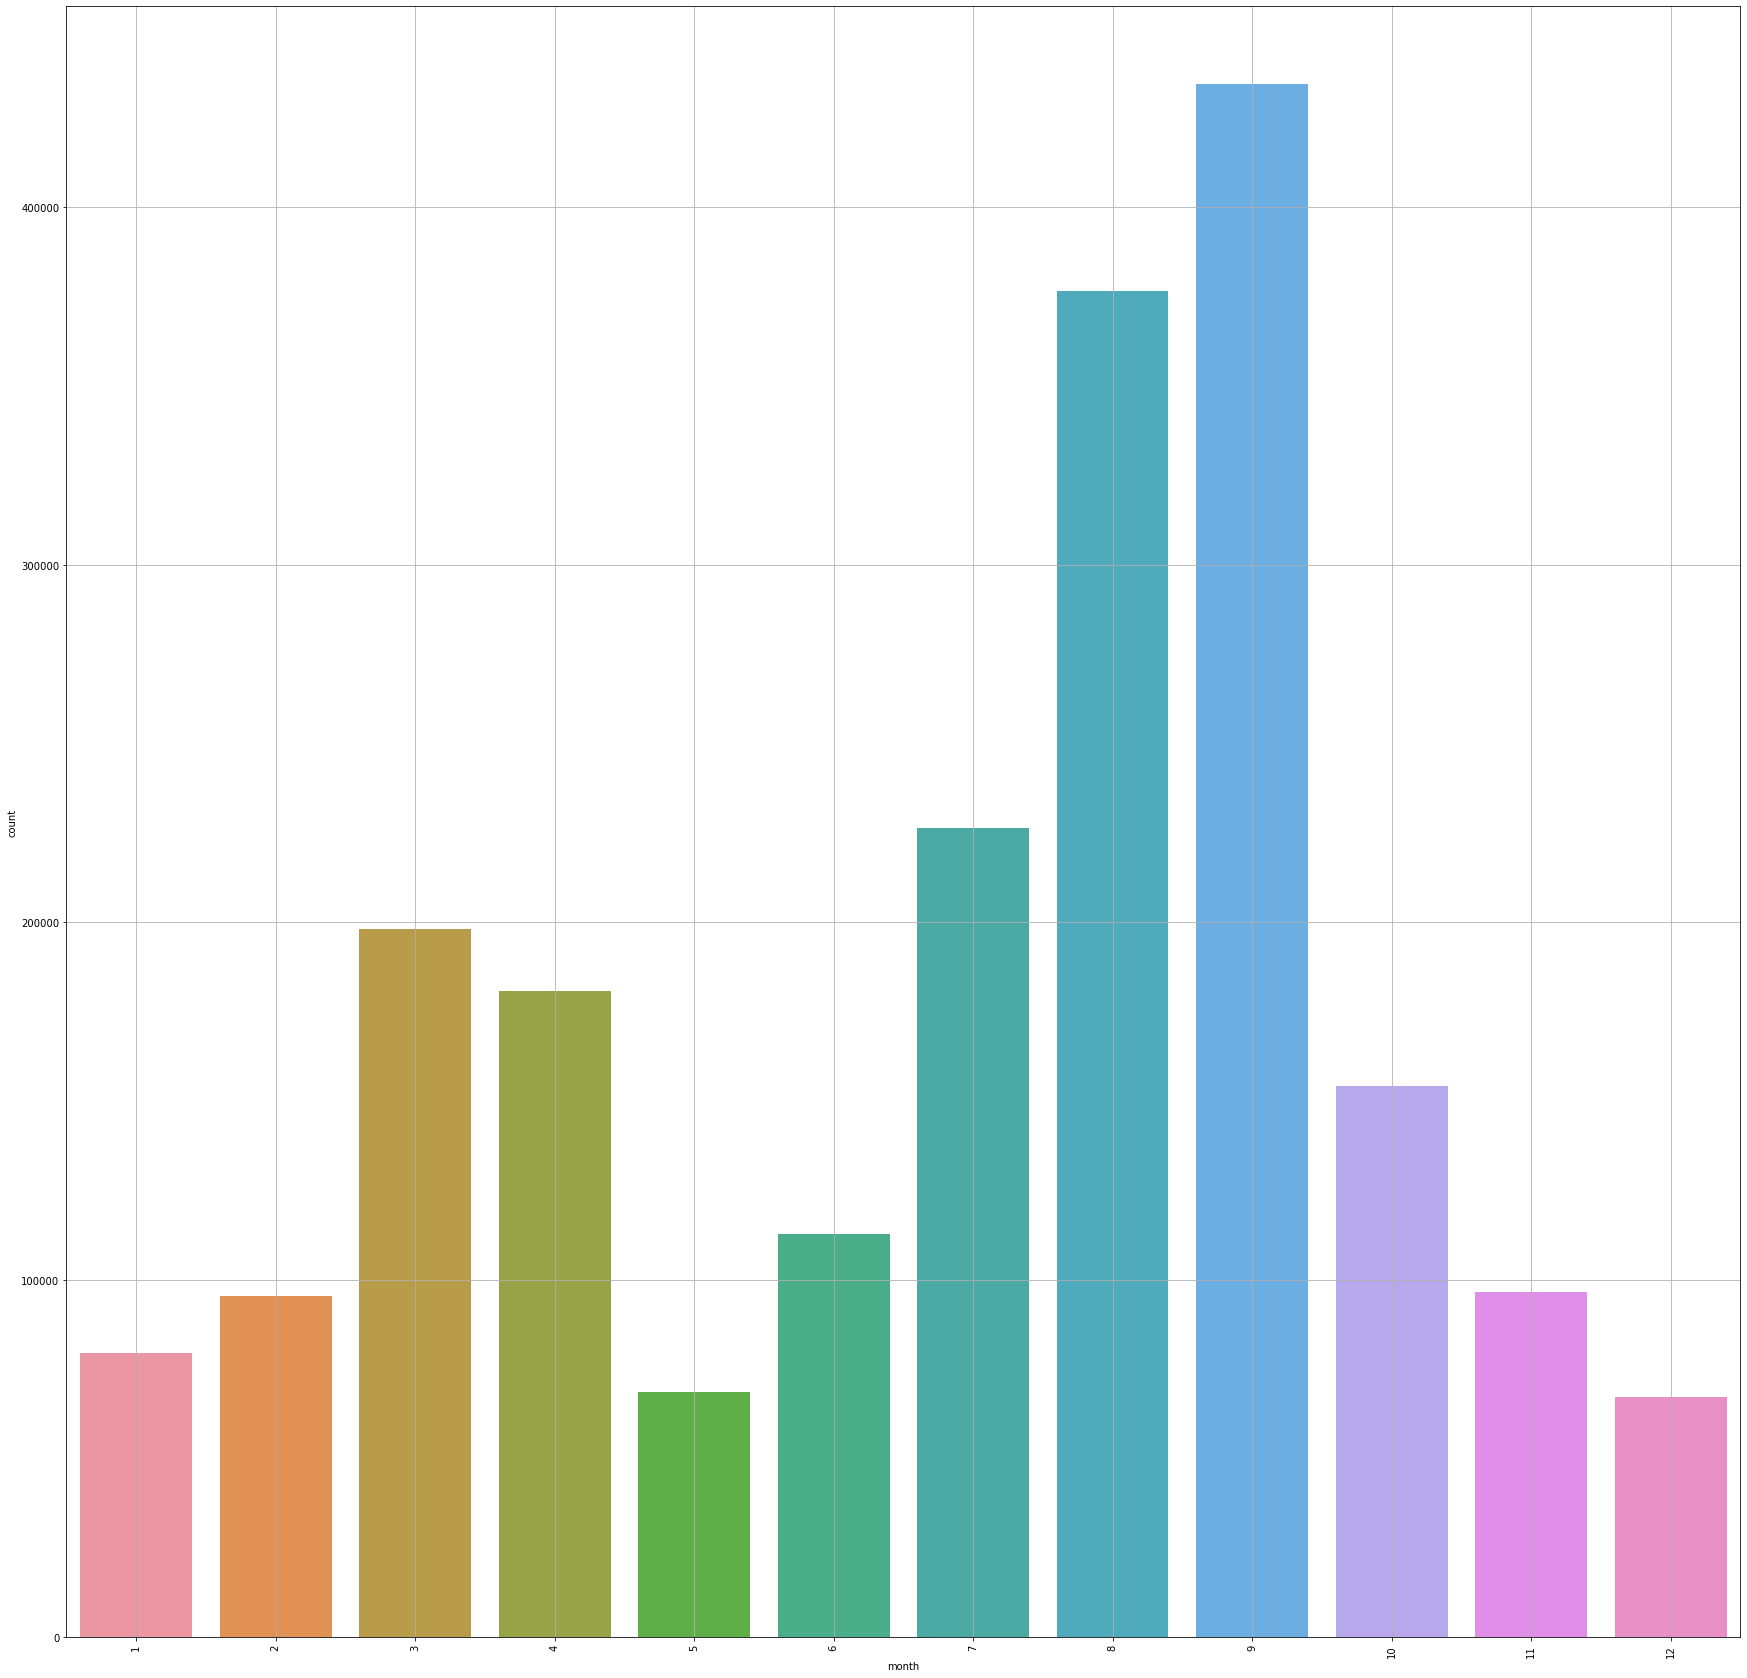

In [13]:
#Create a bar graph to better visualize the months during which the most fire events occur. As we can see by our graph, the months with the most fire incidents are August and September.
df = df
plt.figure(figsize=(30,30))
sns.countplot(df['month'])
plt.xticks(rotation=90)
plt.grid(True)

/Users/phoebeclark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


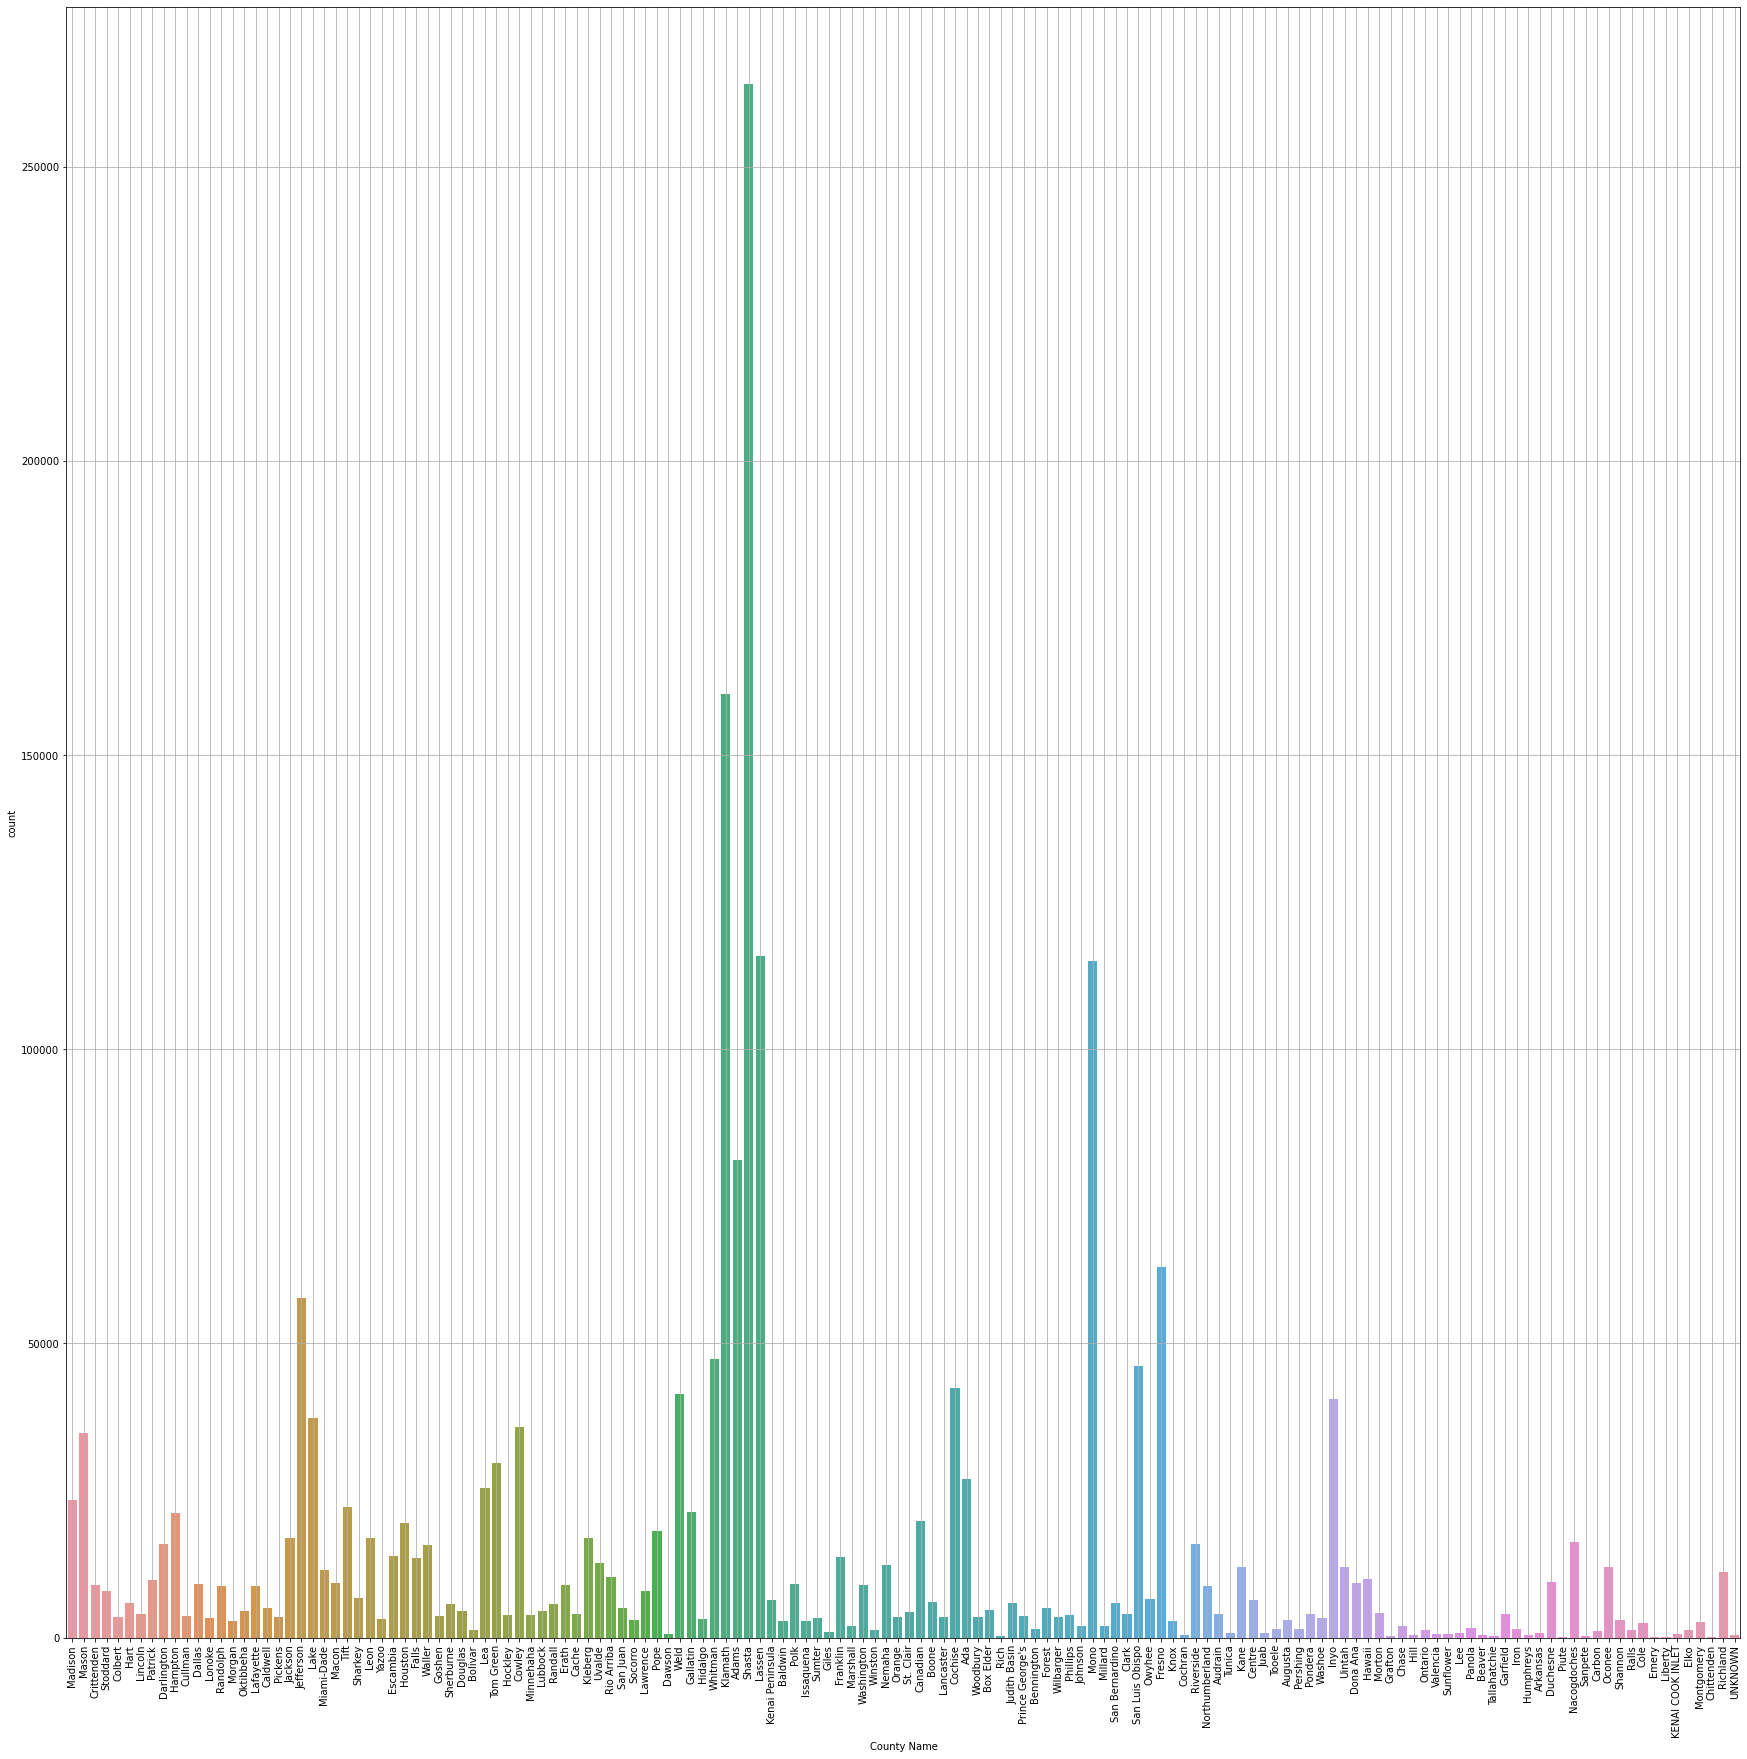

In [14]:
#Create a bar graph to better visualize prevalence of fire events per county in the dataframe.
df = df
plt.figure(figsize=(30,30))
sns.countplot(df['County Name'])
plt.xticks(rotation=90)
plt.grid(True)

/Users/phoebeclark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


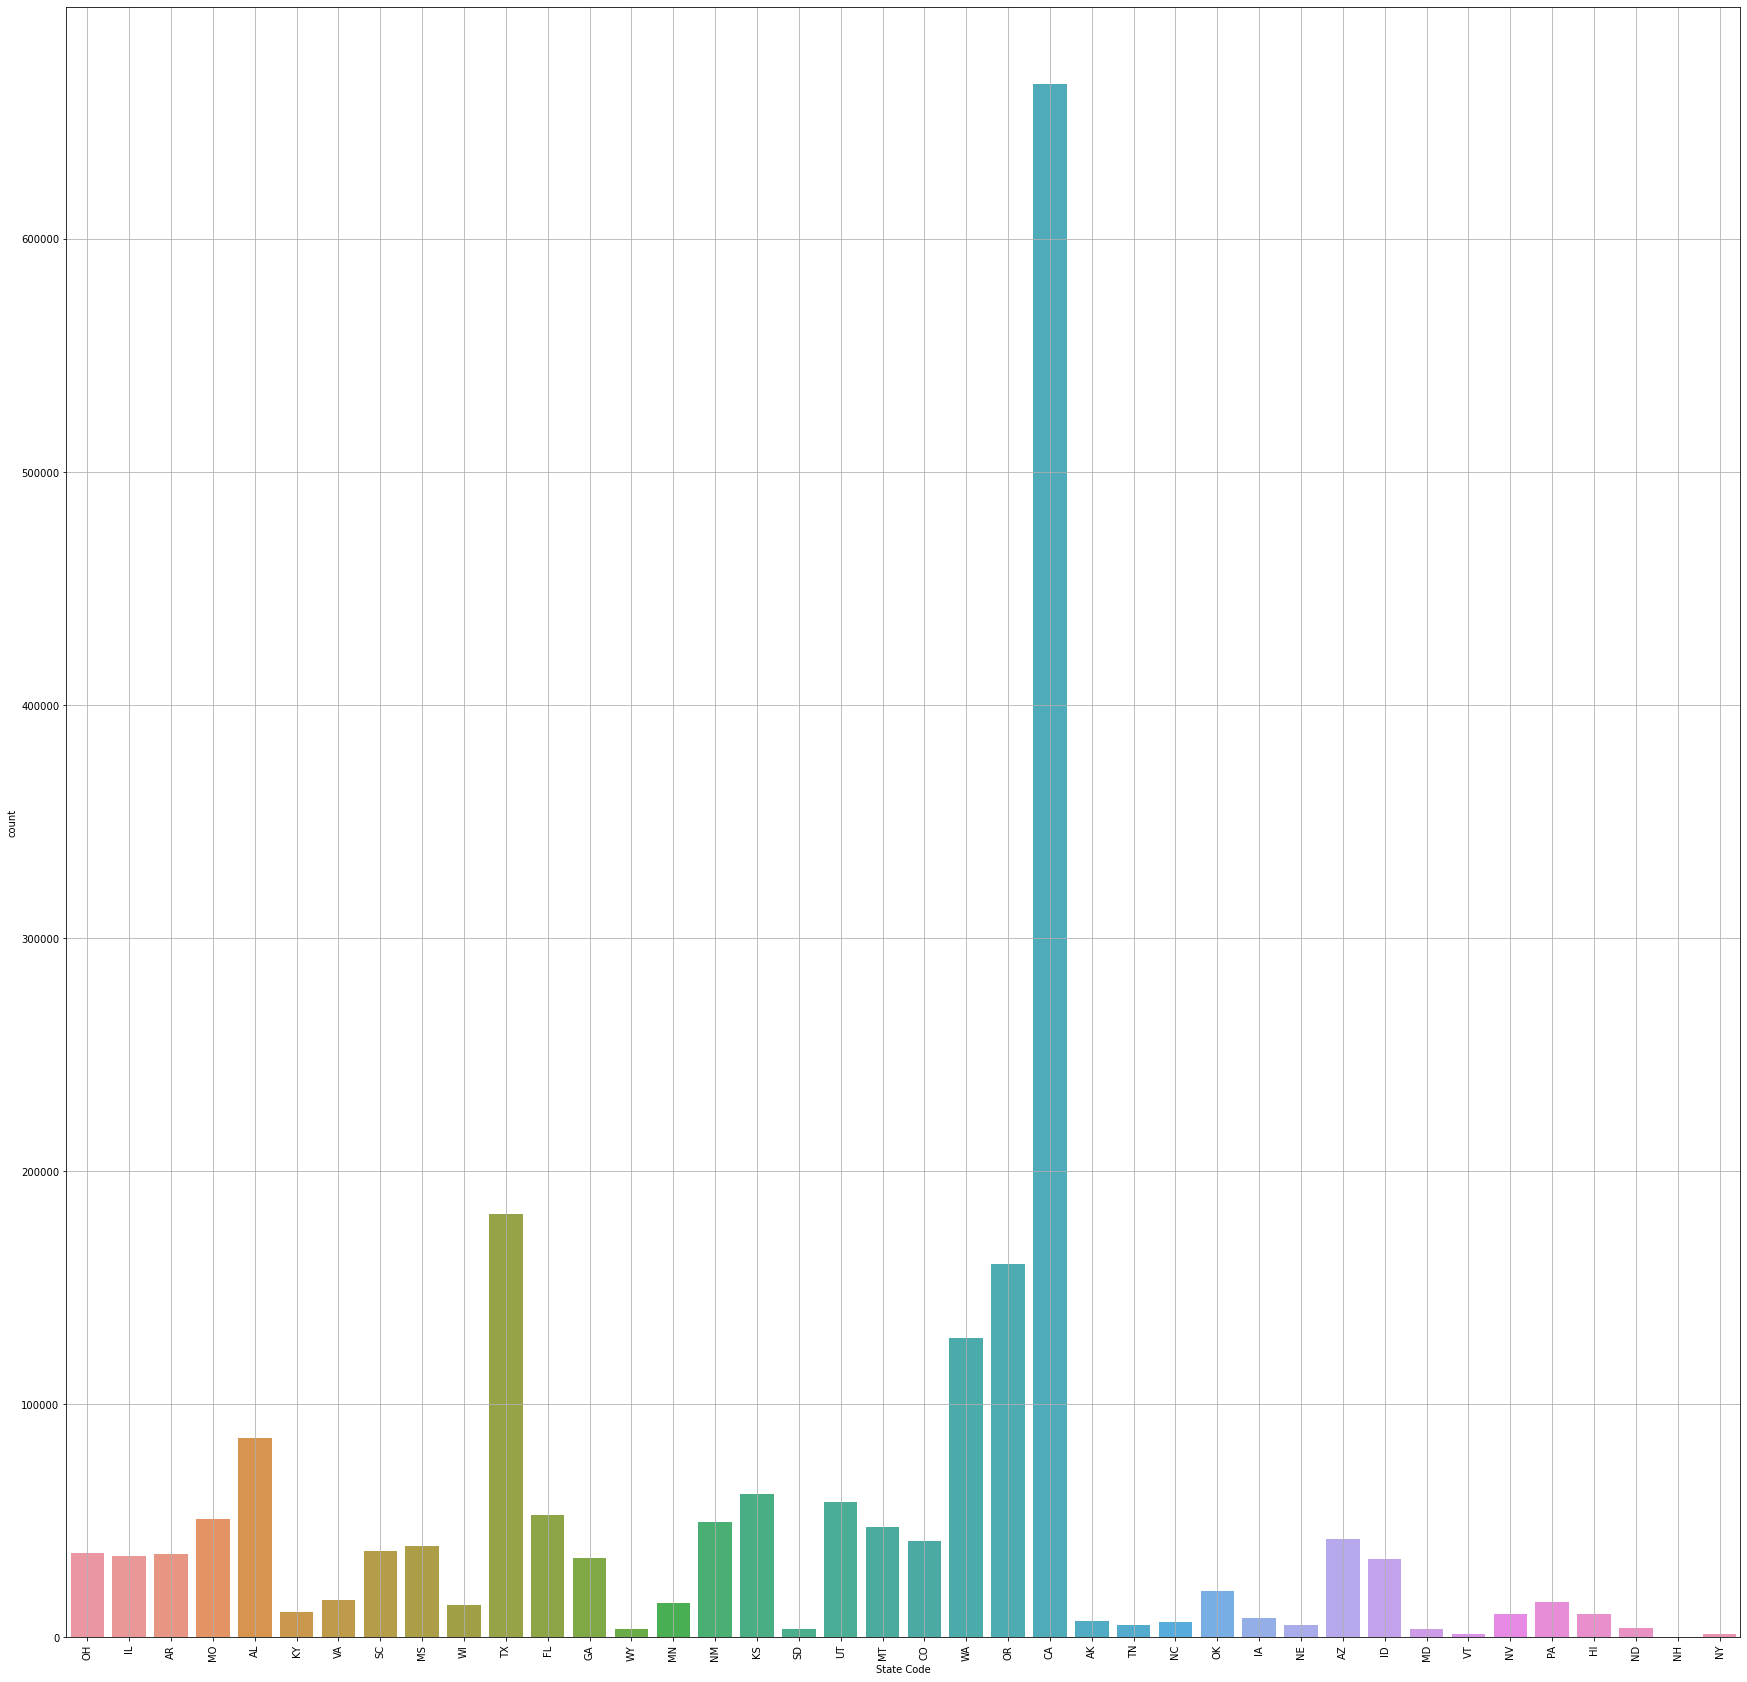

In [15]:
#Create a bar graph to better visualize prevalence of fire events per state in the dataframe. As we can see, the vast majority of fire incidents occur in California and Texas. 
df = df
plt.figure(figsize=(30,30))
sns.countplot(df['State Code'])
plt.xticks(rotation=90)
plt.grid(True)

/Users/phoebeclark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


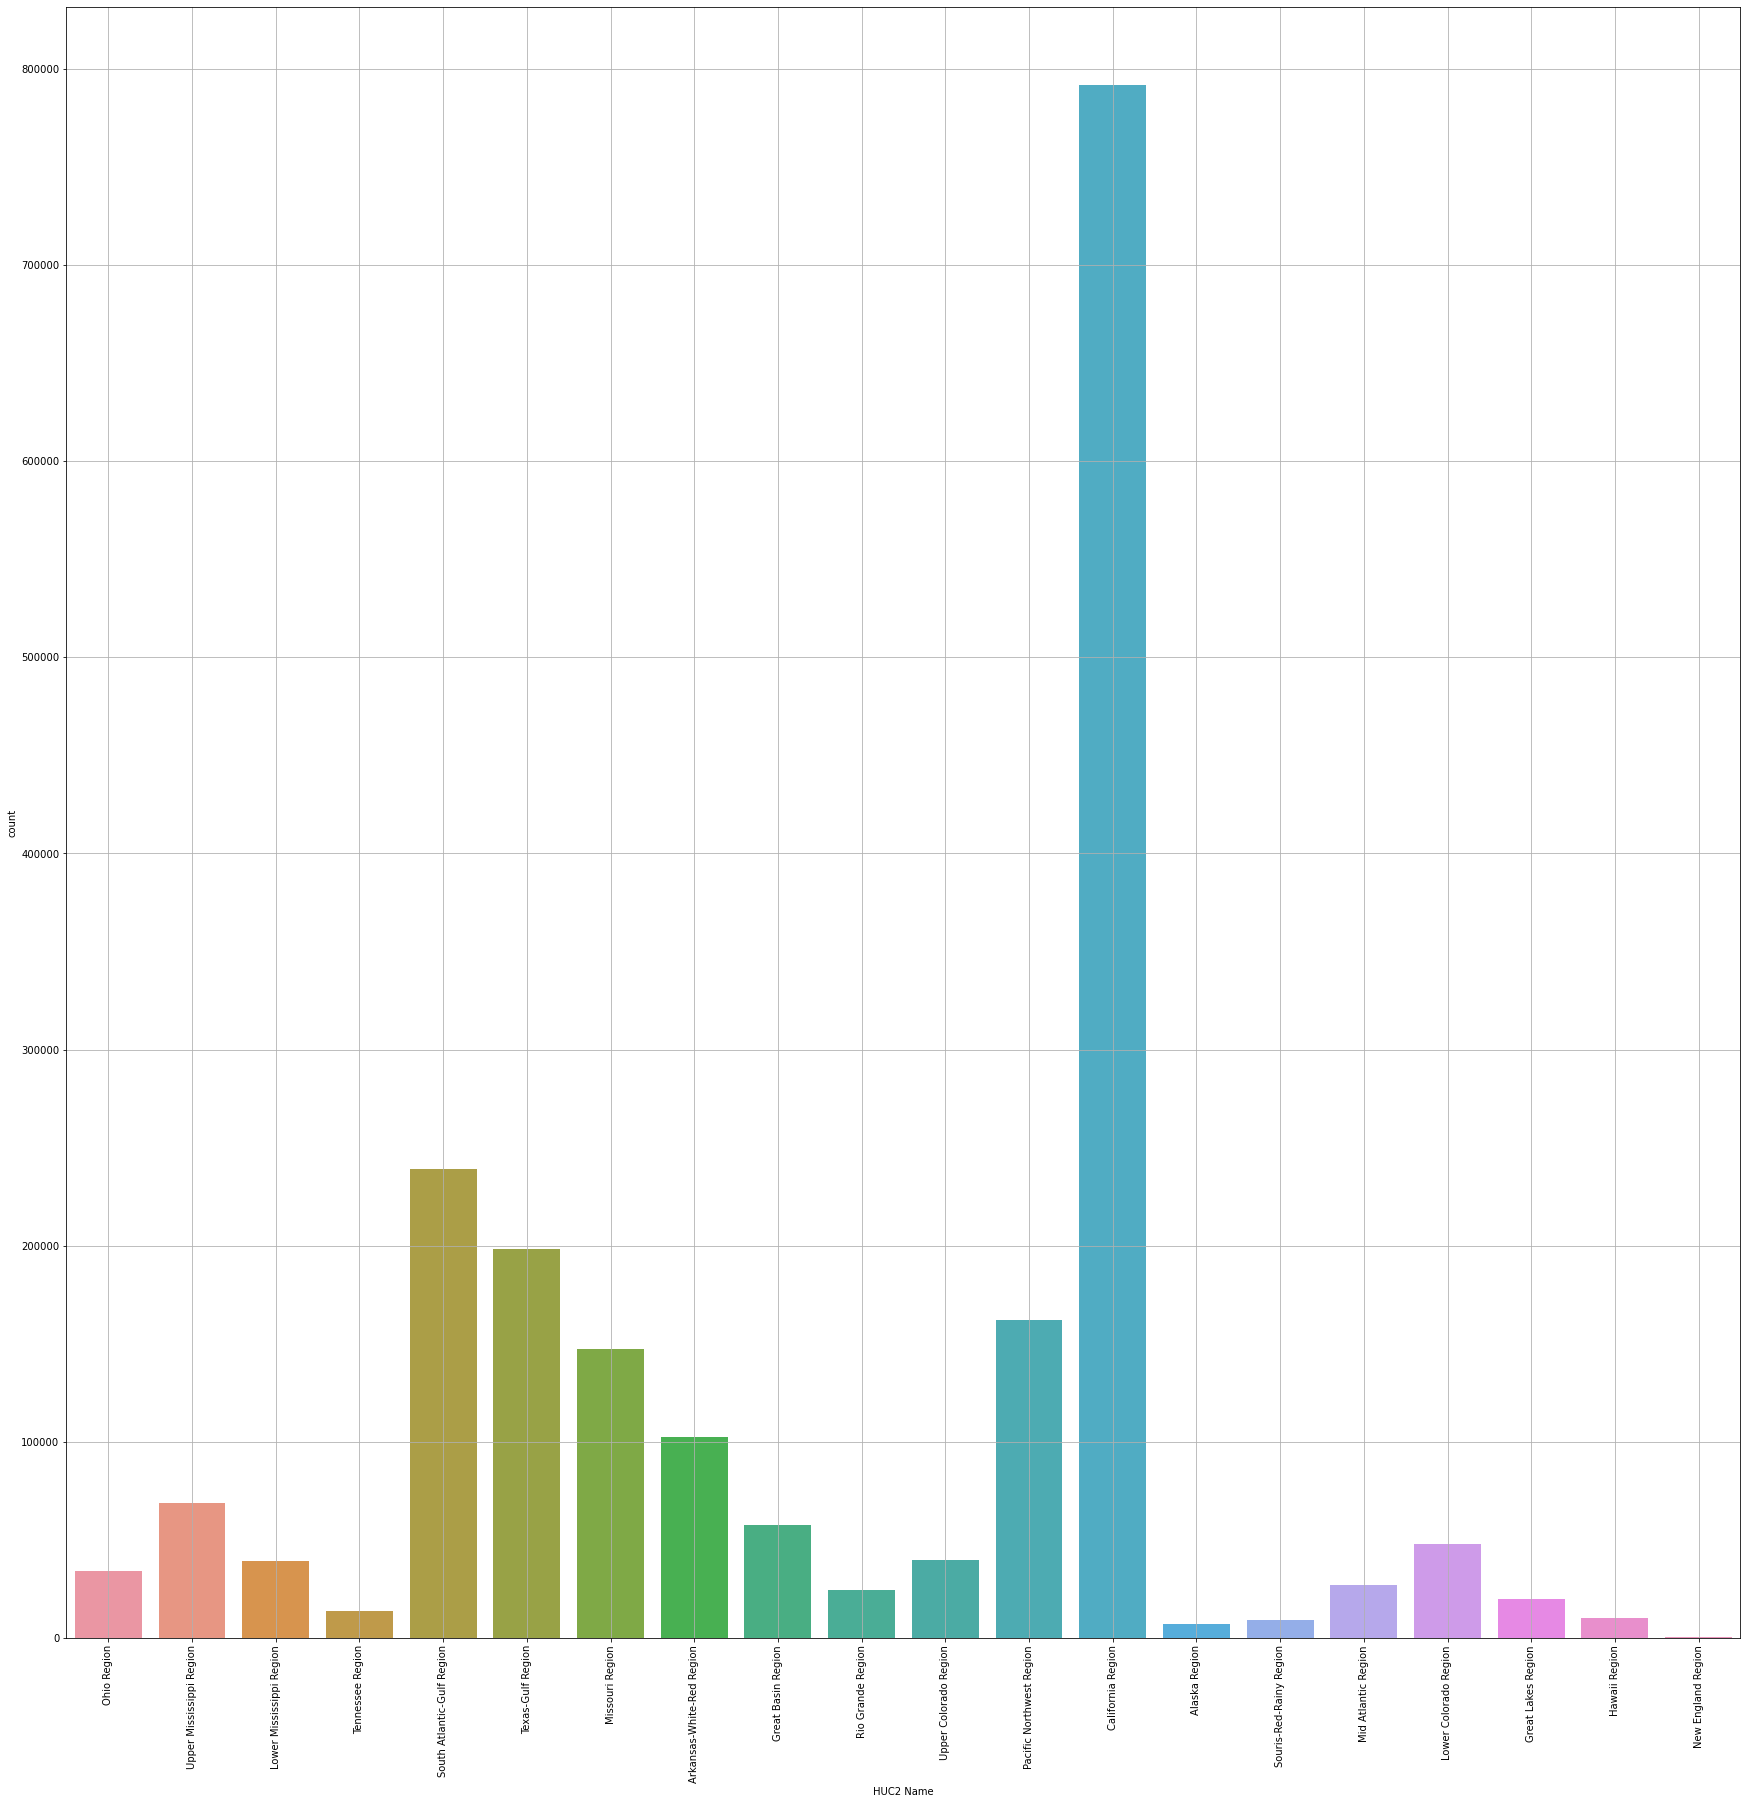

In [16]:
#Create a bar graph to better visualize prevalence of fire events per region in the dataframe.
plt.figure(figsize=(30,30))
sns.countplot(df['HUC2 Name'])
plt.xticks(rotation=90)
plt.grid(True)

/Users/phoebeclark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


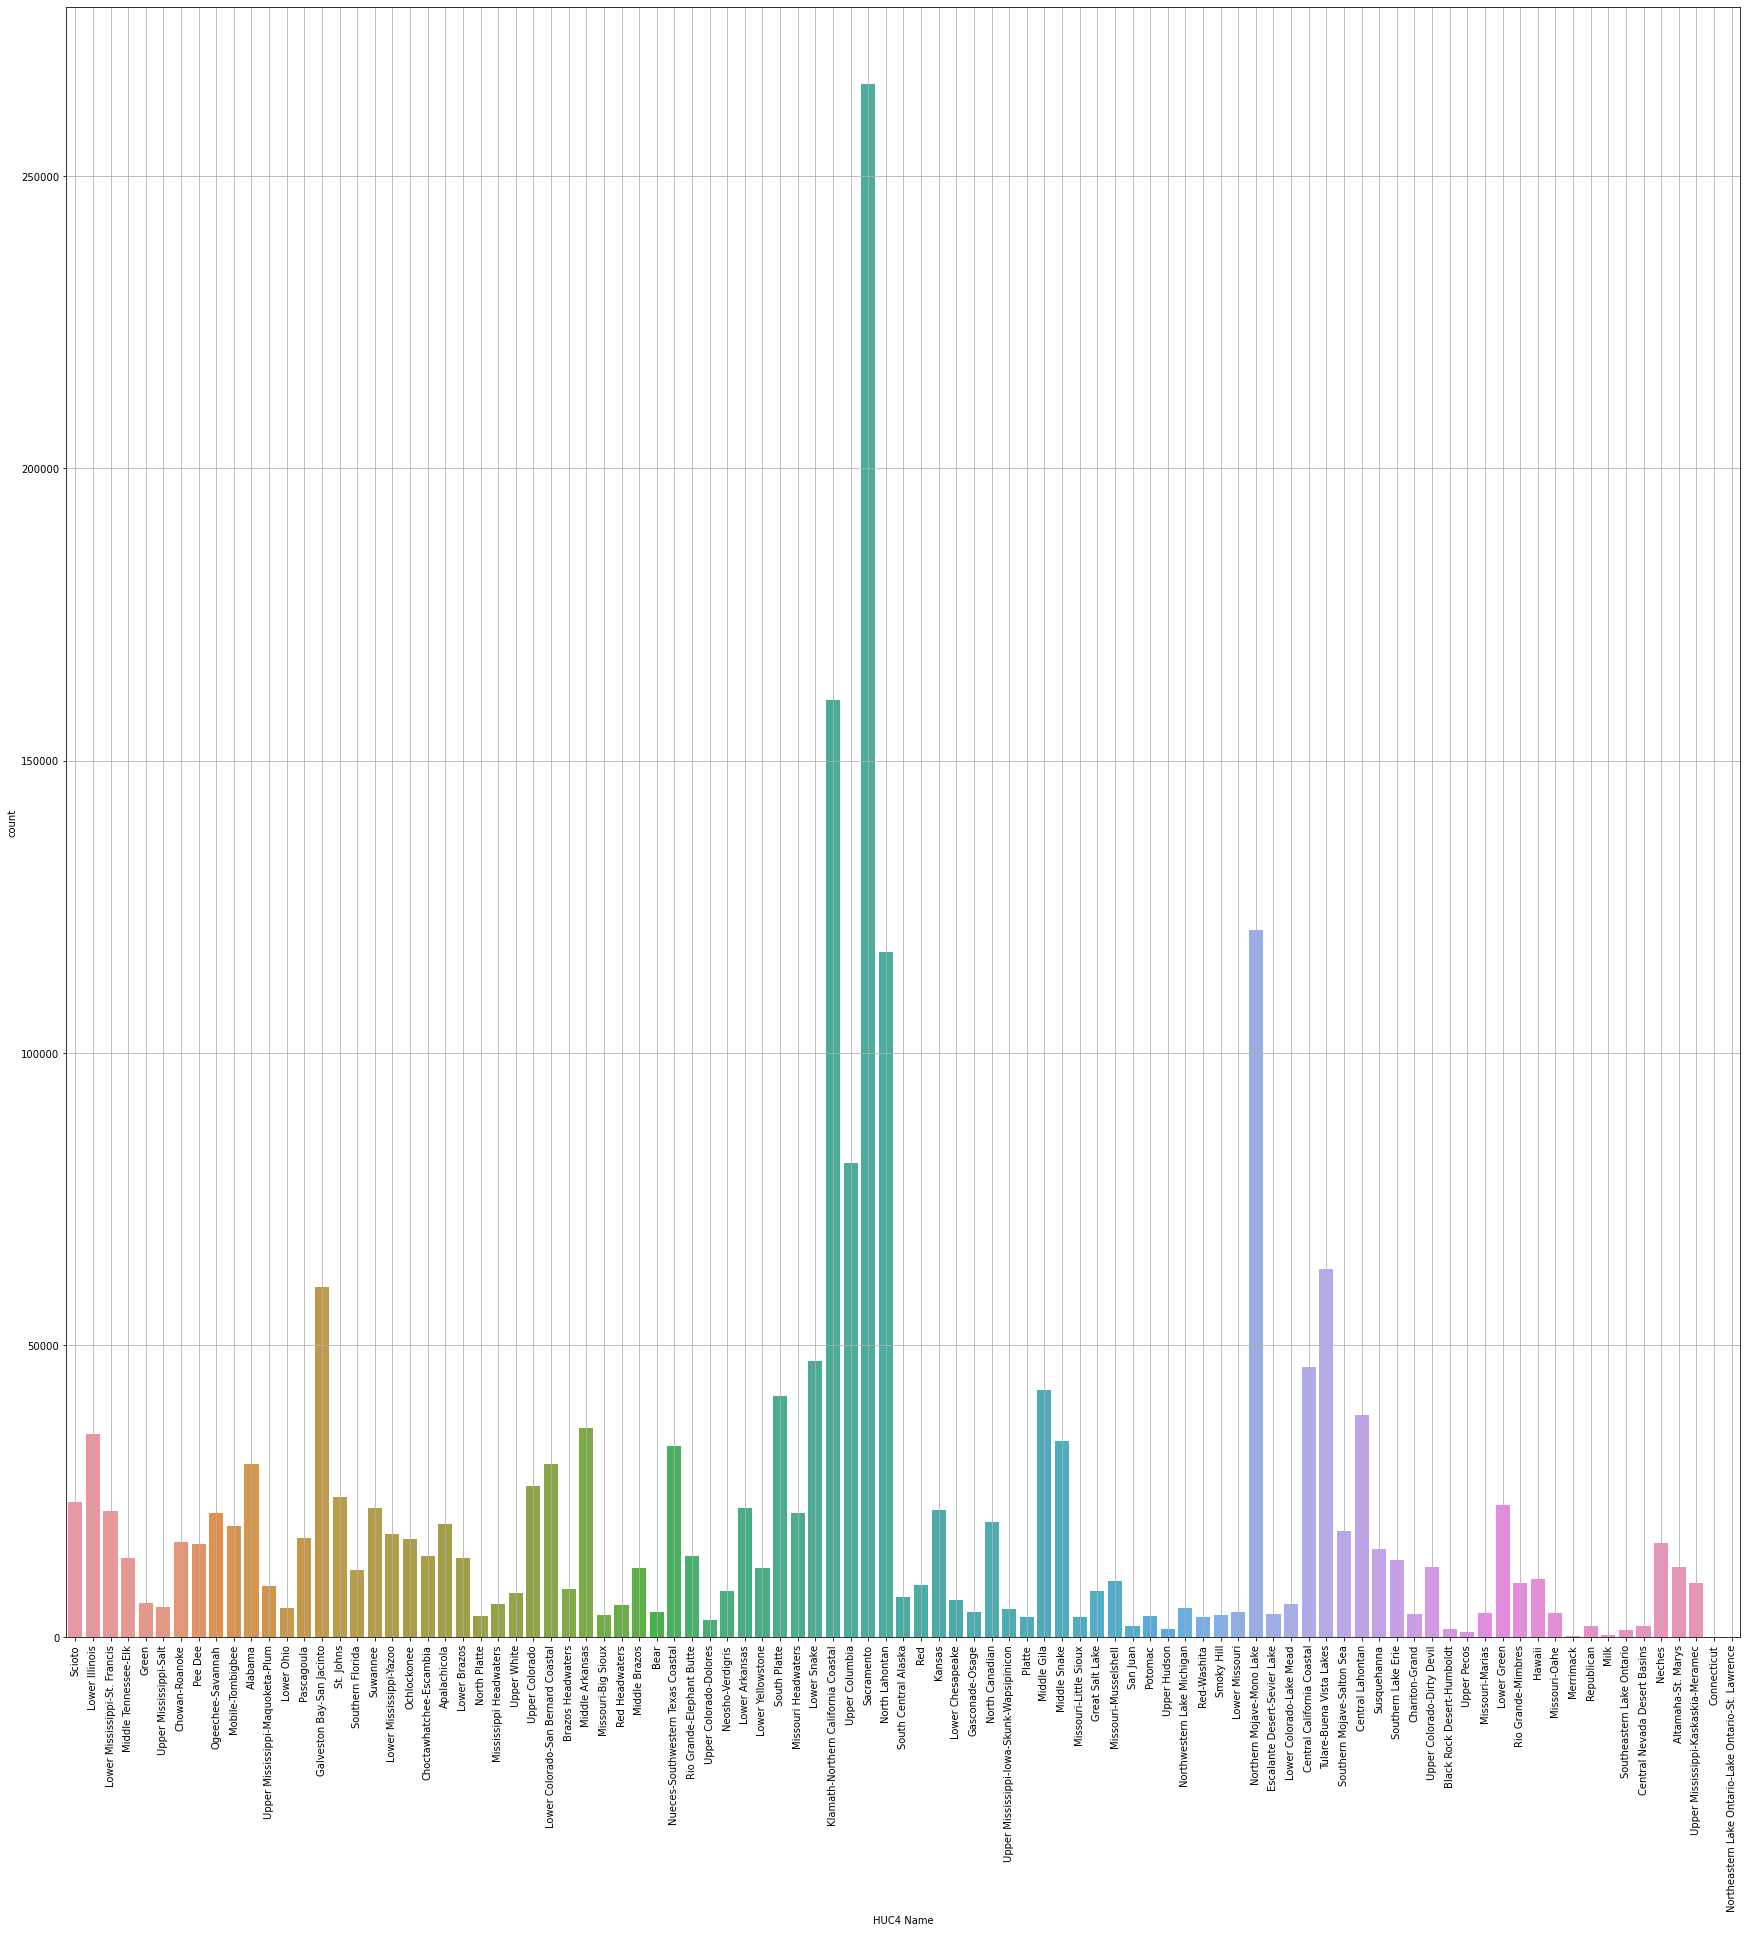

In [17]:
#Create a bar graph to better visualize prevalence of fire events per subregion in the dataframe.
plt.figure(figsize=(30,30))
sns.countplot(df['HUC4 Name'])
plt.xticks(rotation=90)
plt.grid(True)

/Users/phoebeclark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


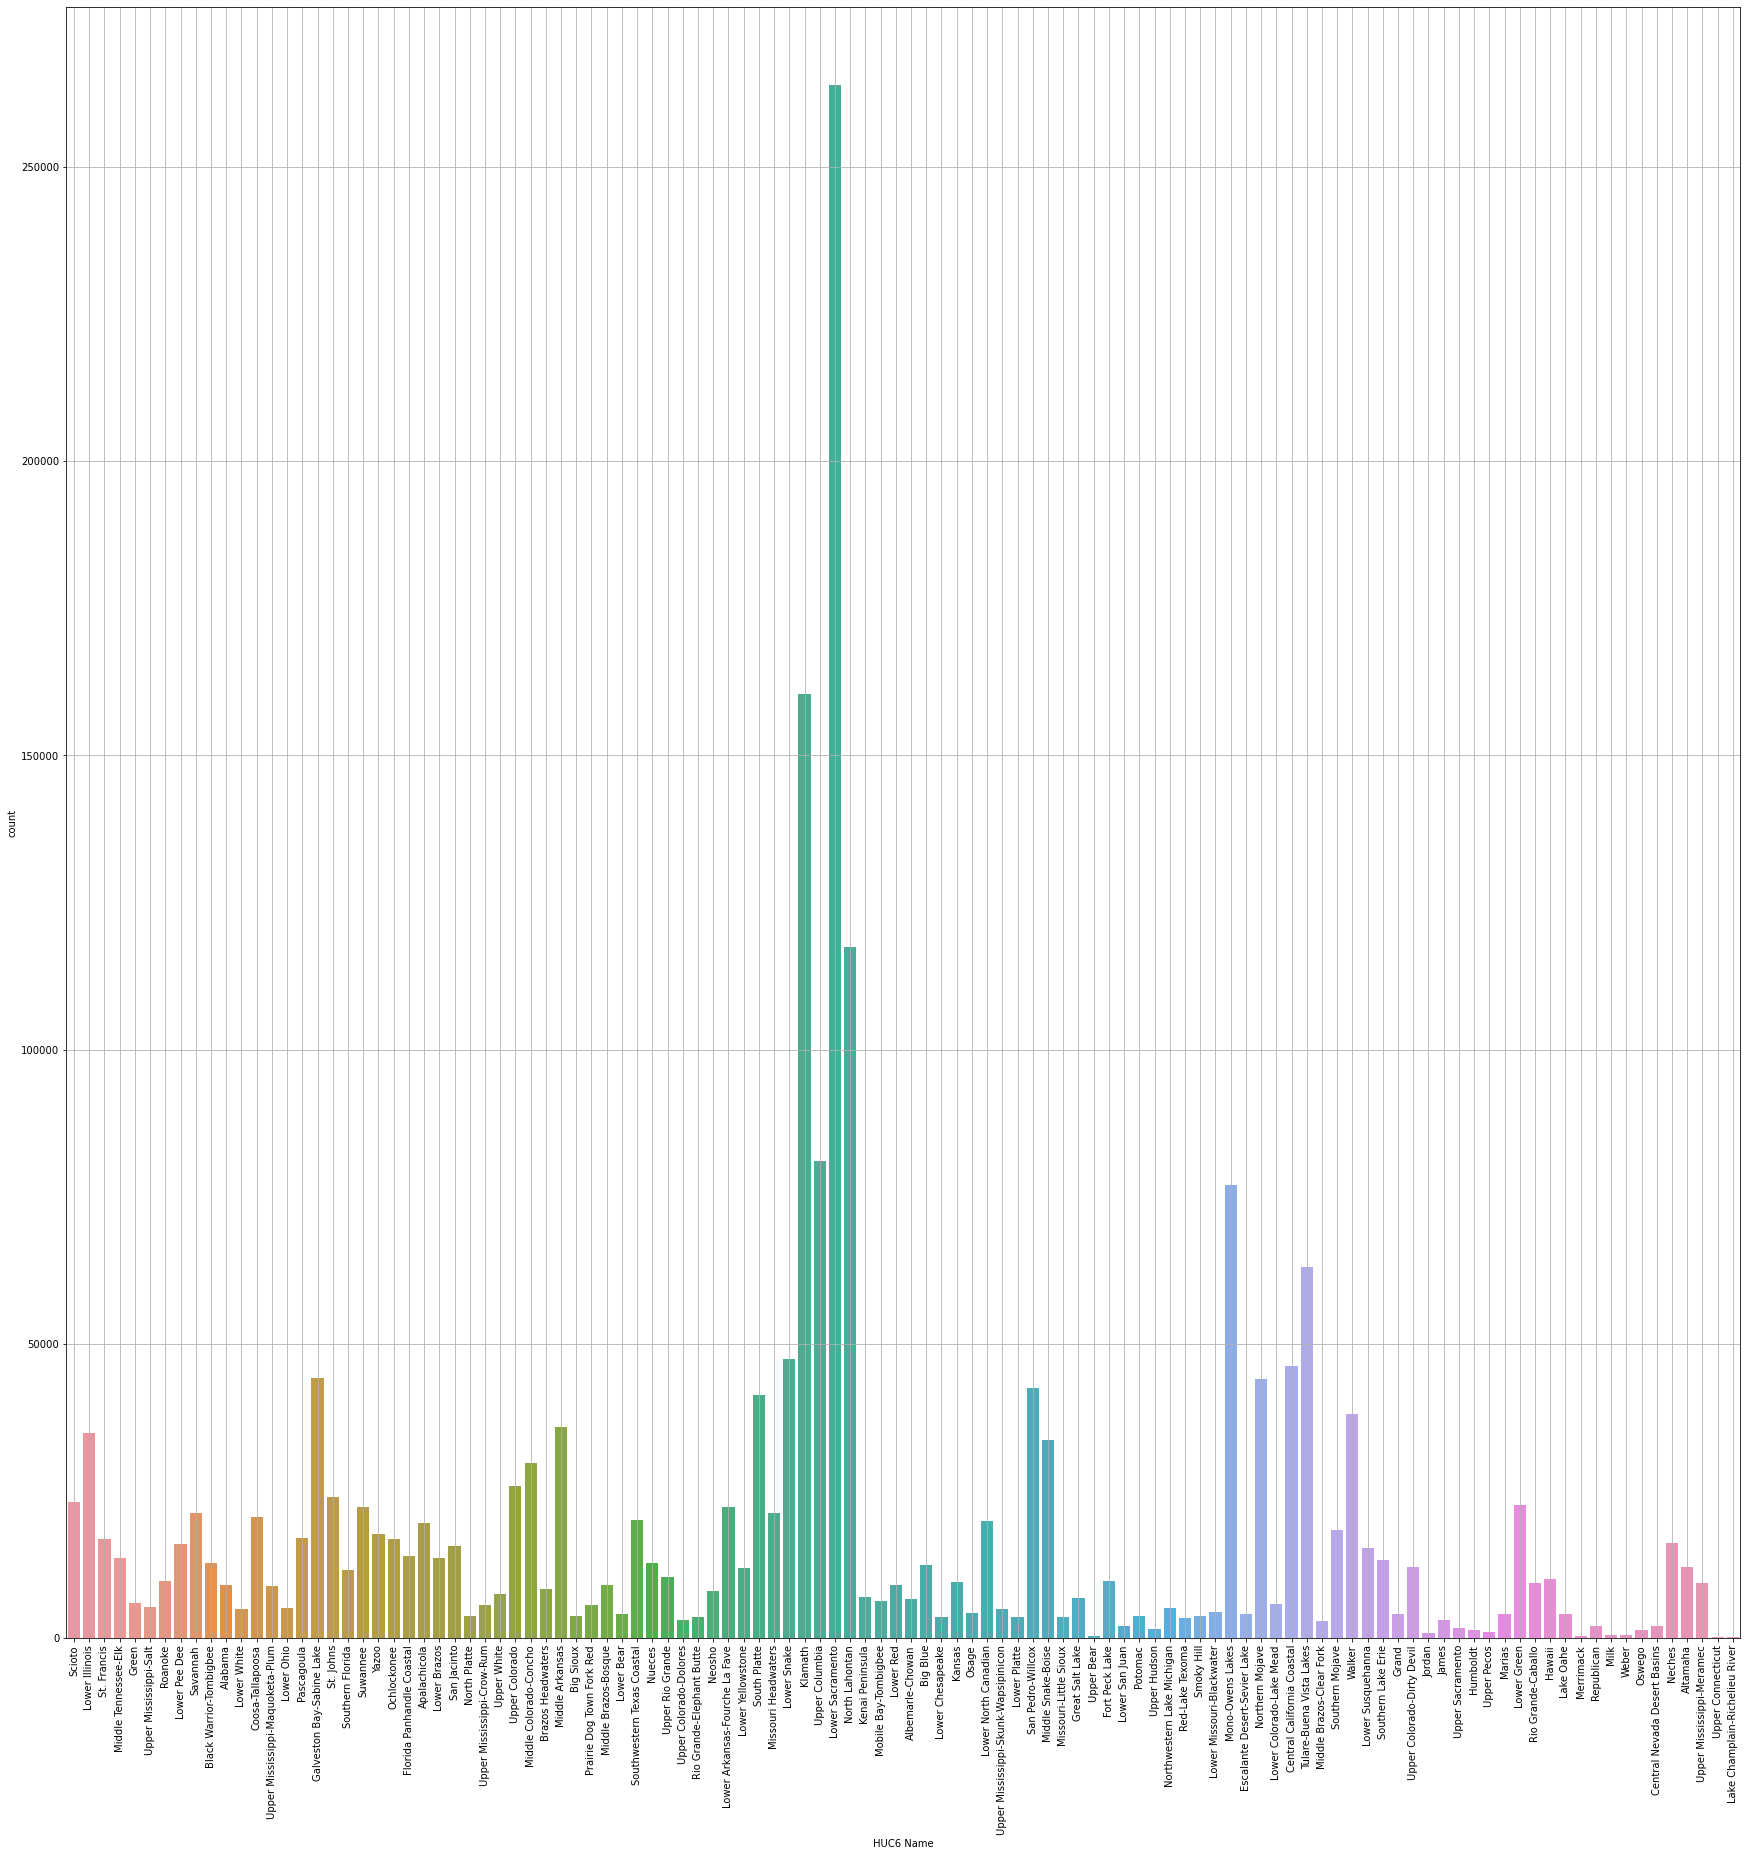

In [18]:
plt.figure(figsize=(30,30))
sns.countplot(df['HUC6 Name'])
plt.xticks(rotation=90)
plt.grid(True)

/Users/phoebeclark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


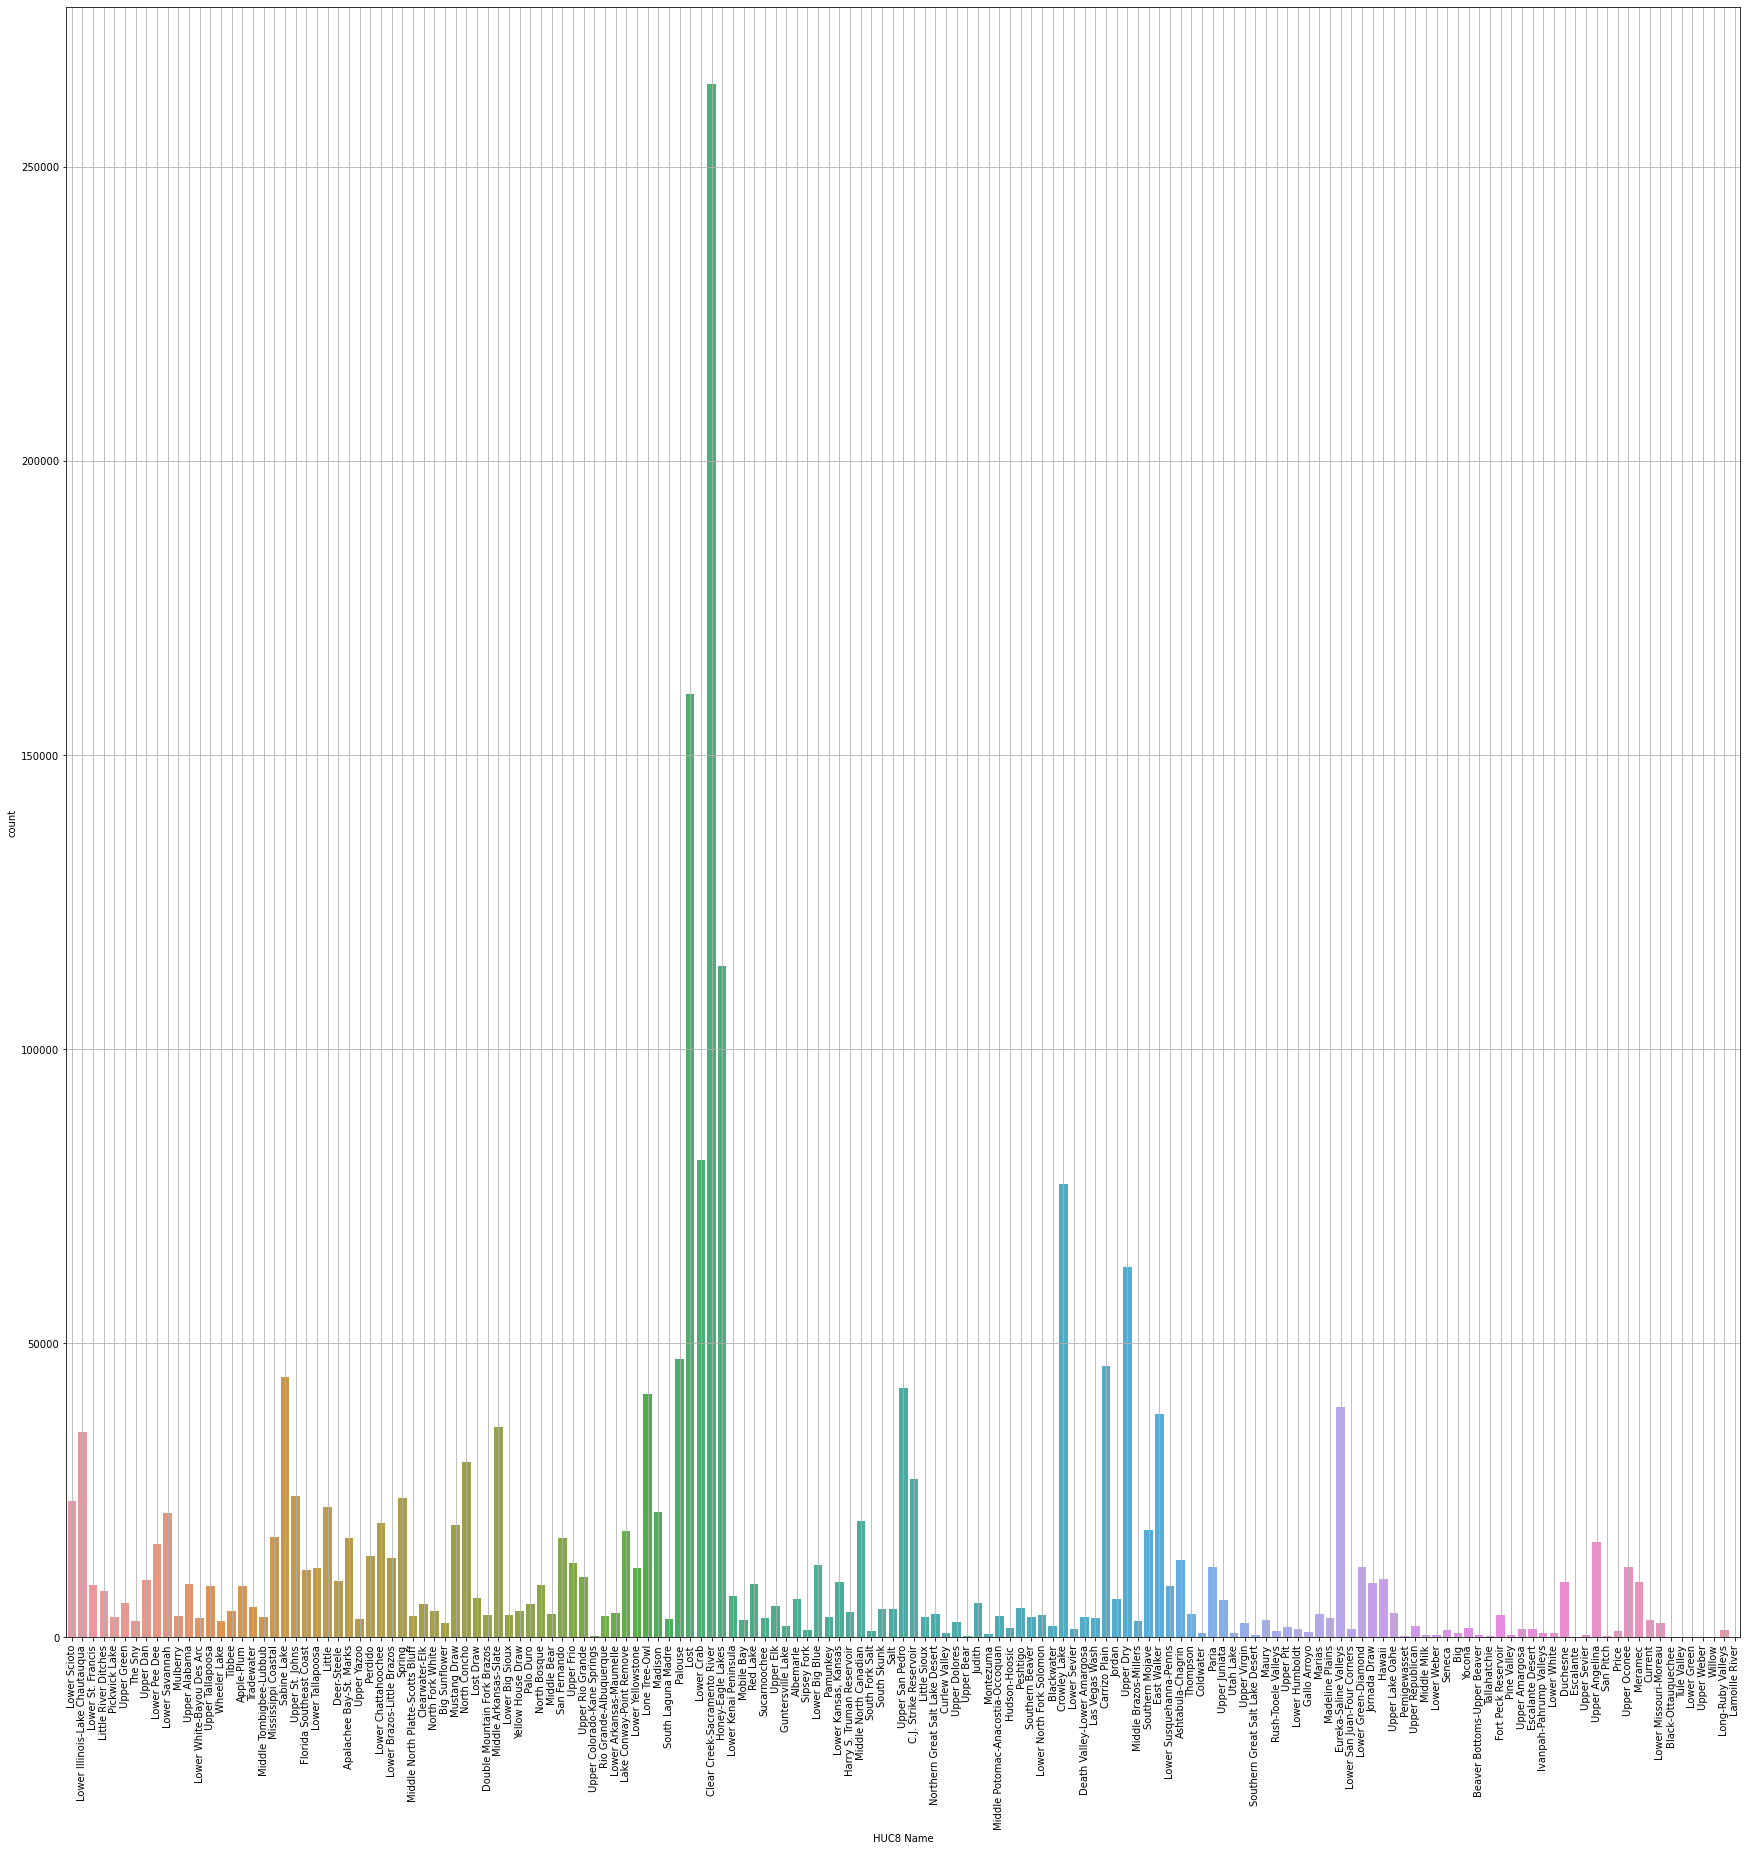

In [19]:
#Create a bar graph to better visualize prevalence of fire events per subbasin level in the dataframe.
plt.figure(figsize=(30,30))
sns.countplot(df['HUC8 Name'])
plt.xticks(rotation=90)
plt.grid(True)

<AxesSubplot:>

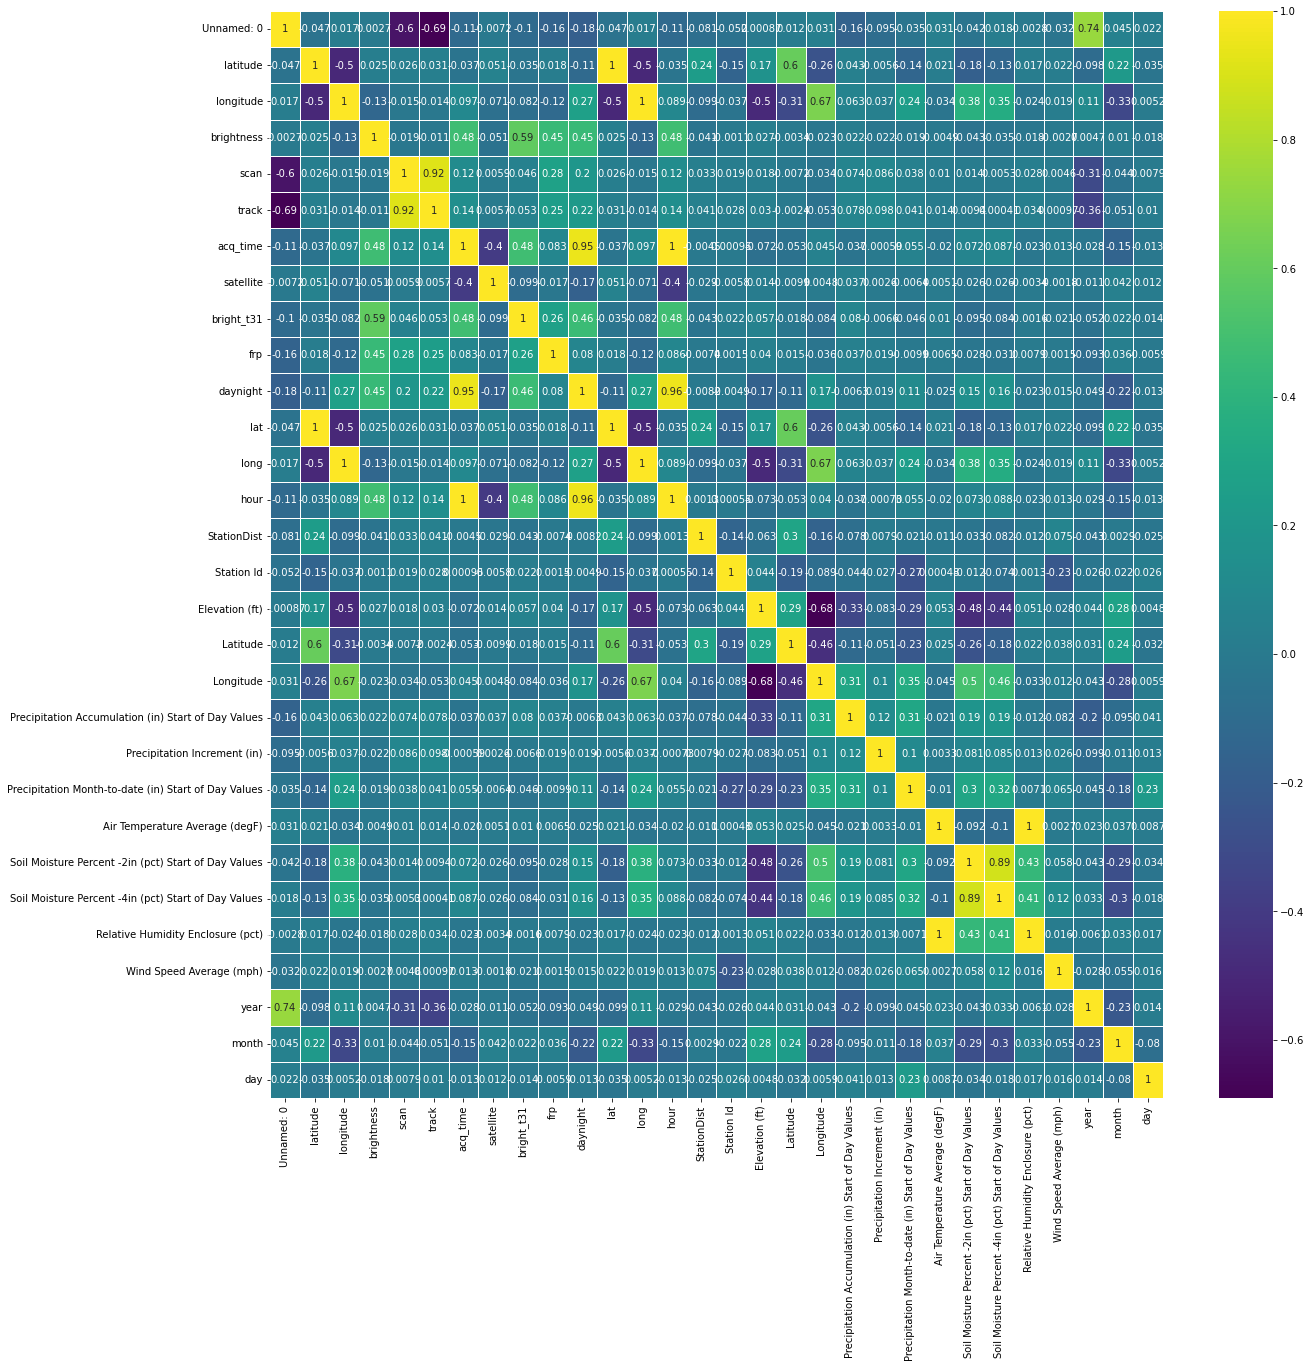

In [20]:
#Create a correlation matrix to better visualize the correlations between different features in the dataframe.  
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = 'viridis', linewidths = 1.0)

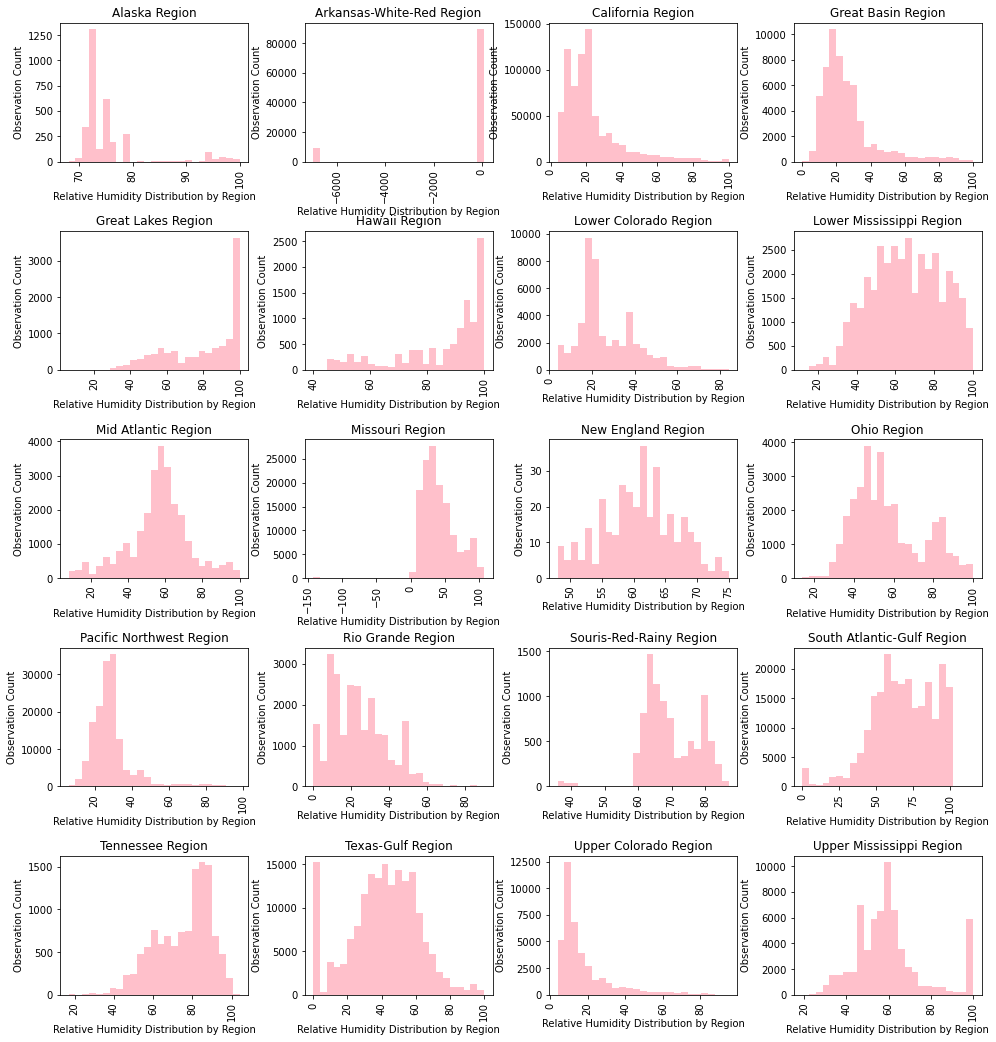

In [21]:
#Create histograms of the distribution of relative humidity measurements, seperated by region.
ax = df.hist(column='Relative Humidity Enclosure (pct)', by='HUC2 Name', bins=25, figsize=(16,18), grid=False, color='pink')
for x in ax.flatten():
    x.set_xlabel("Relative Humidity Distribution by Region")
    x.set_ylabel("Observation Count")

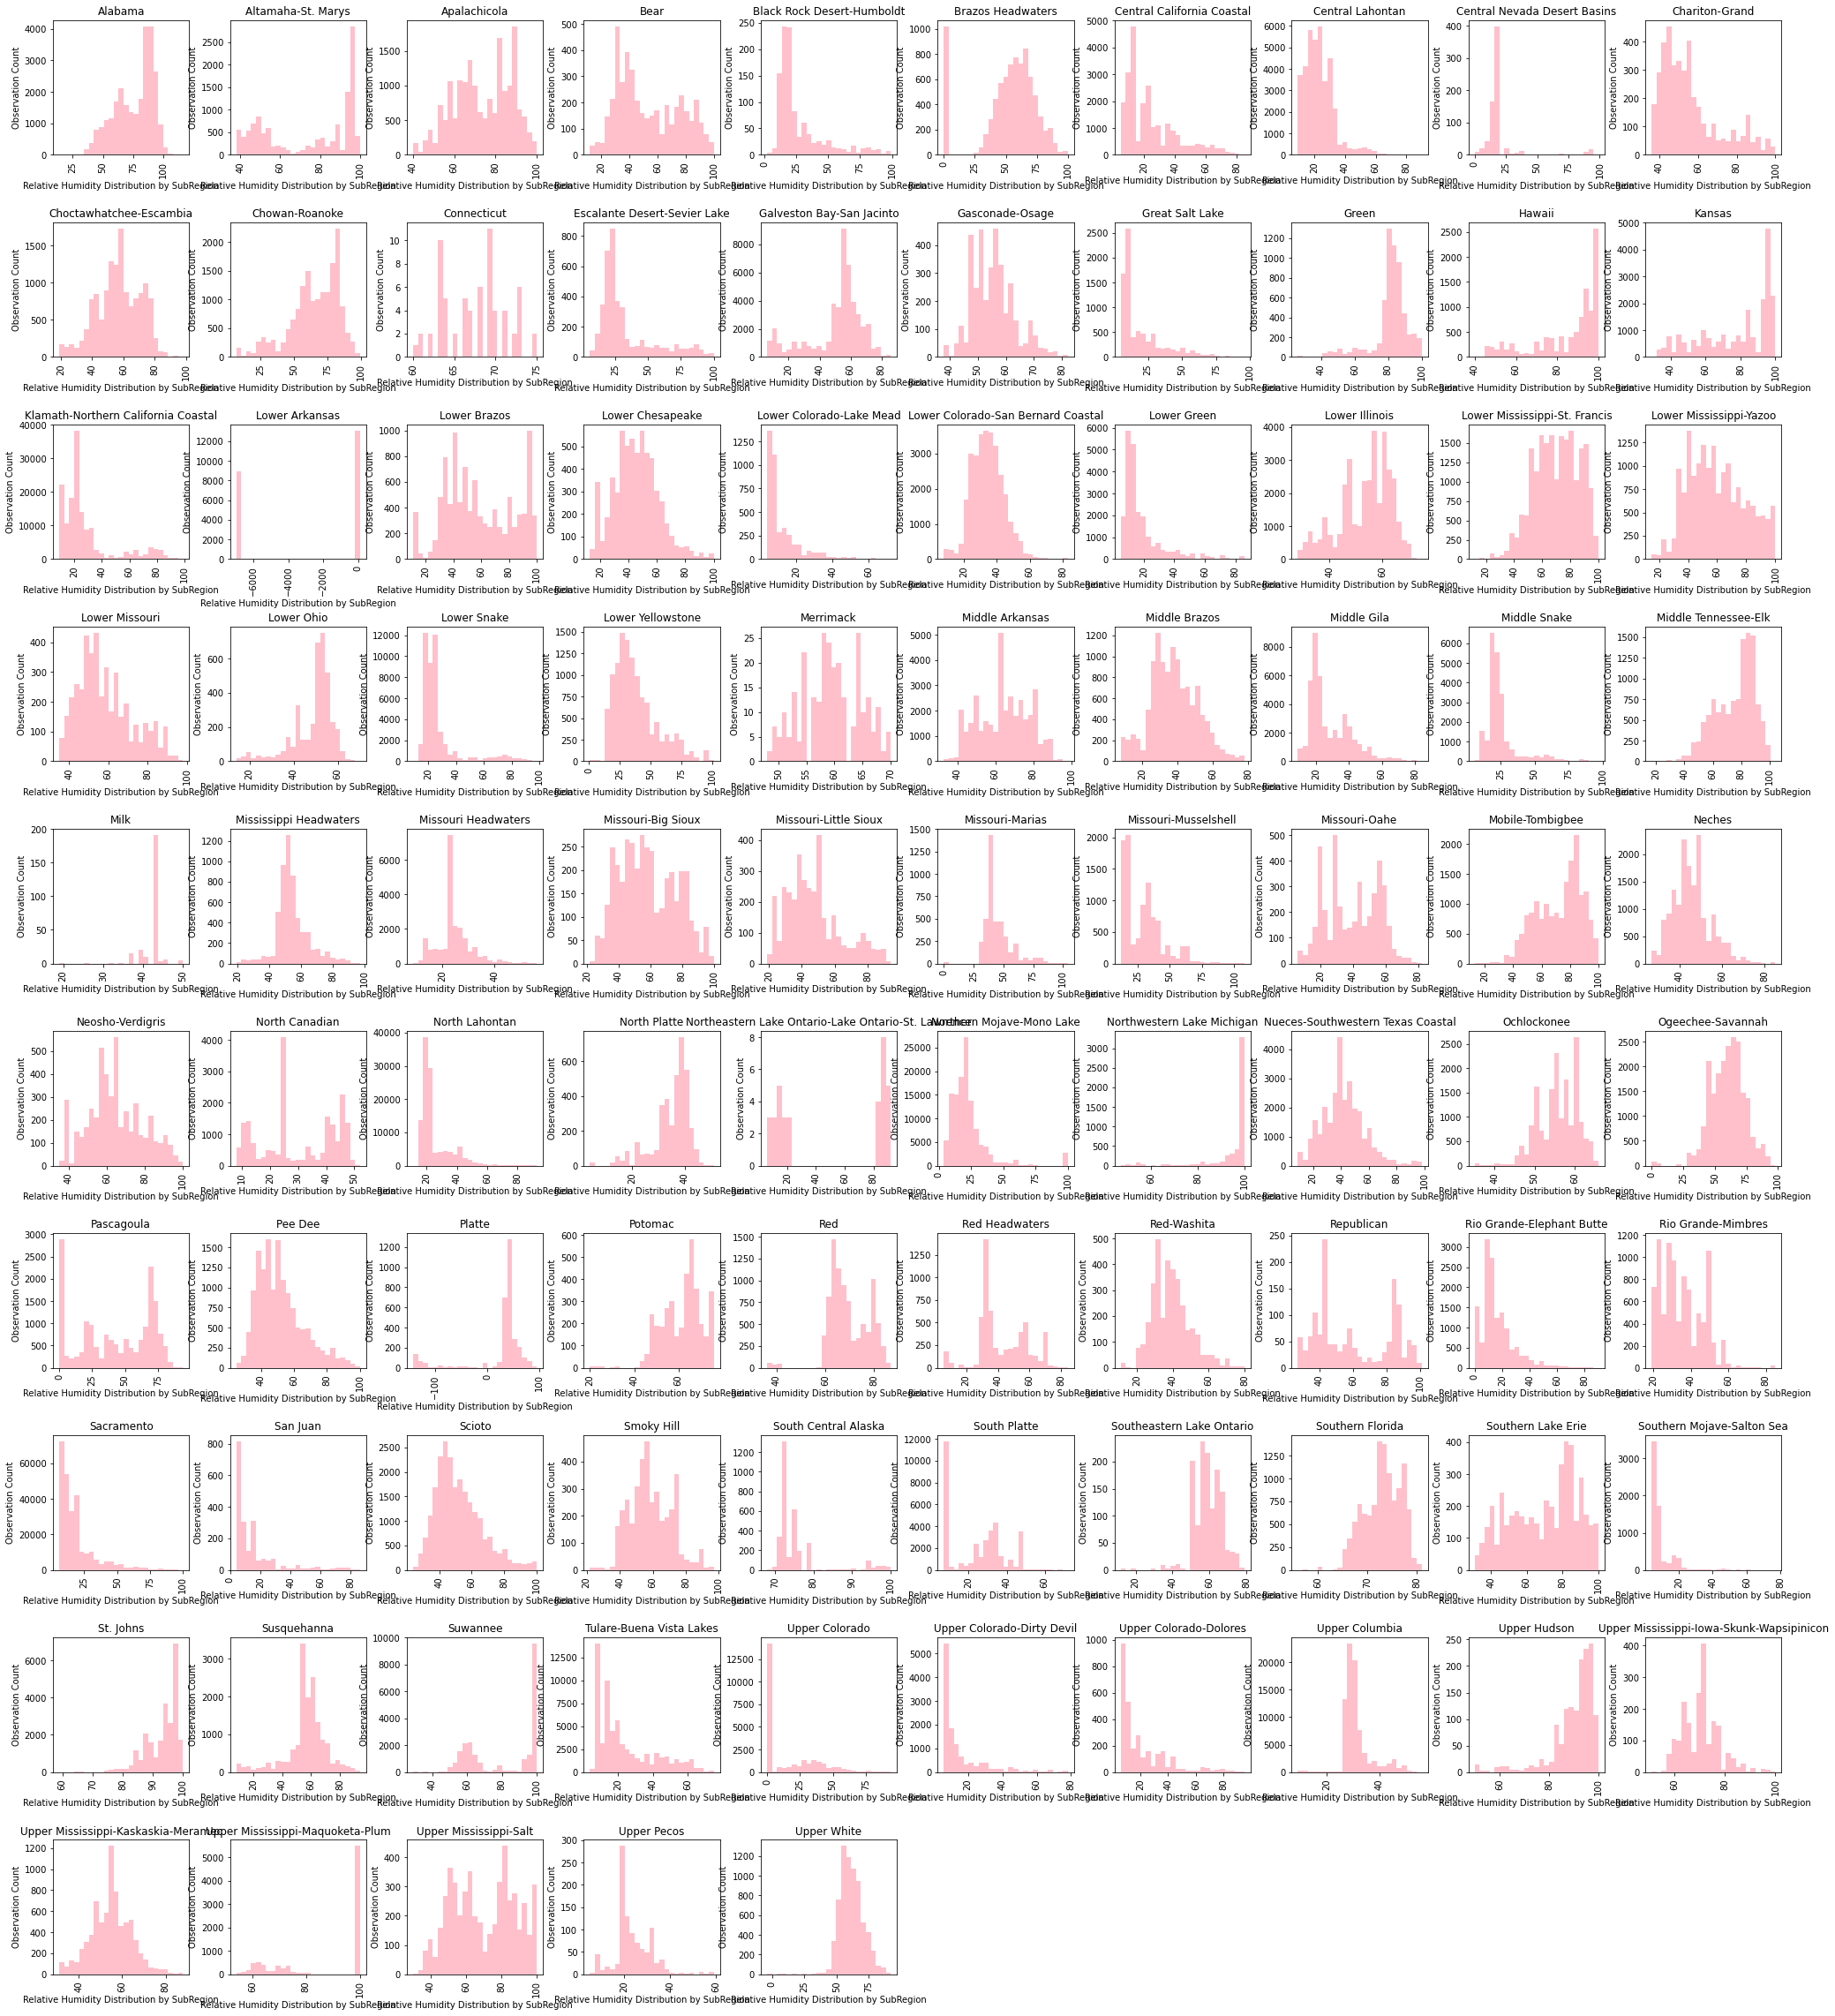

In [22]:
#Create histograms of the distribution of relative humidity measurements, seperated by subregion.
ax = df.hist(column='Relative Humidity Enclosure (pct)', by='HUC4 Name', bins=25, figsize=(34,41), grid=False, color='pink')
for x in ax.flatten():
    x.set_xlabel("Relative Humidity Distribution by SubRegion")
    x.set_ylabel("Observation Count")

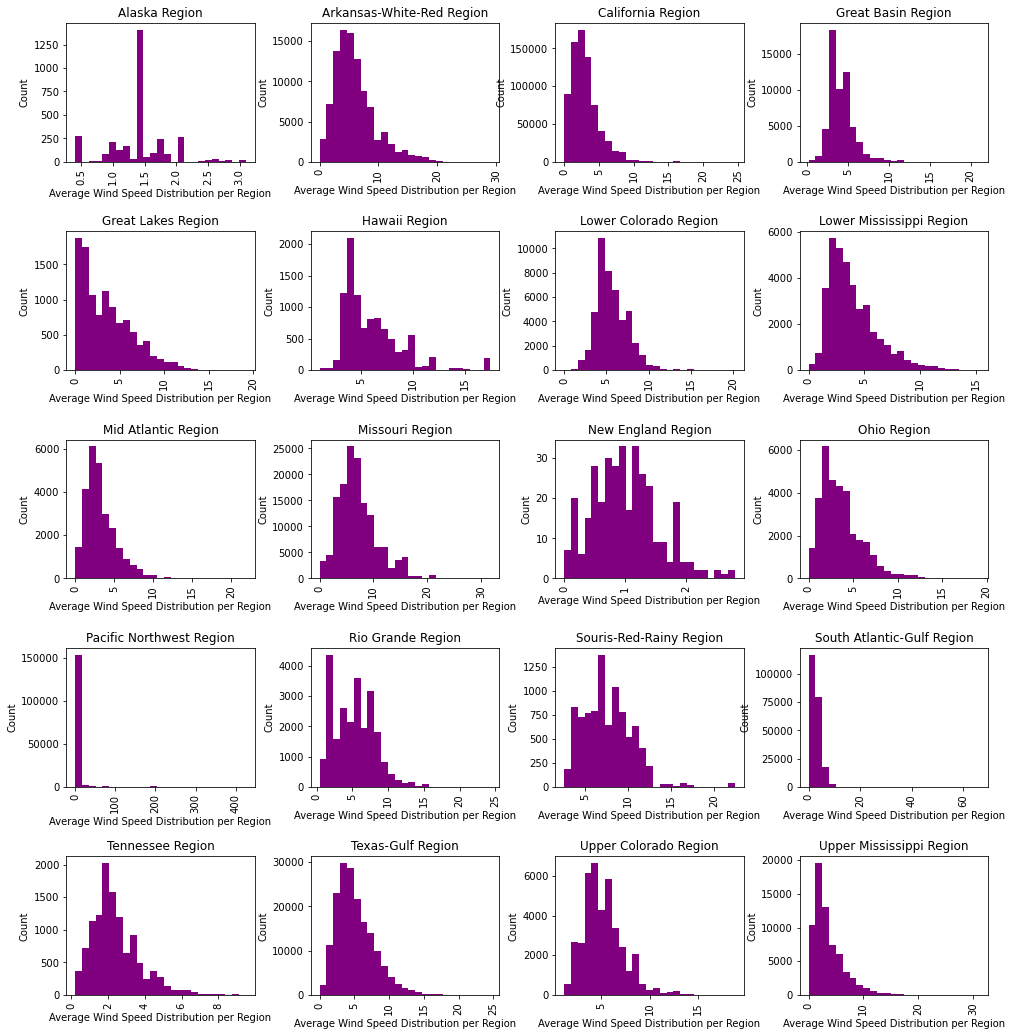

In [23]:
#Create histograms of the distribution of average wind speed measurements, seperated by region.
ax = df.hist(column='Wind Speed Average (mph)', by='HUC2 Name', bins=25, figsize=(16,18), grid=False, color='purple')
for x in ax.flatten():
    x.set_xlabel("Average Wind Speed Distribution per Region")
    x.set_ylabel("Count")

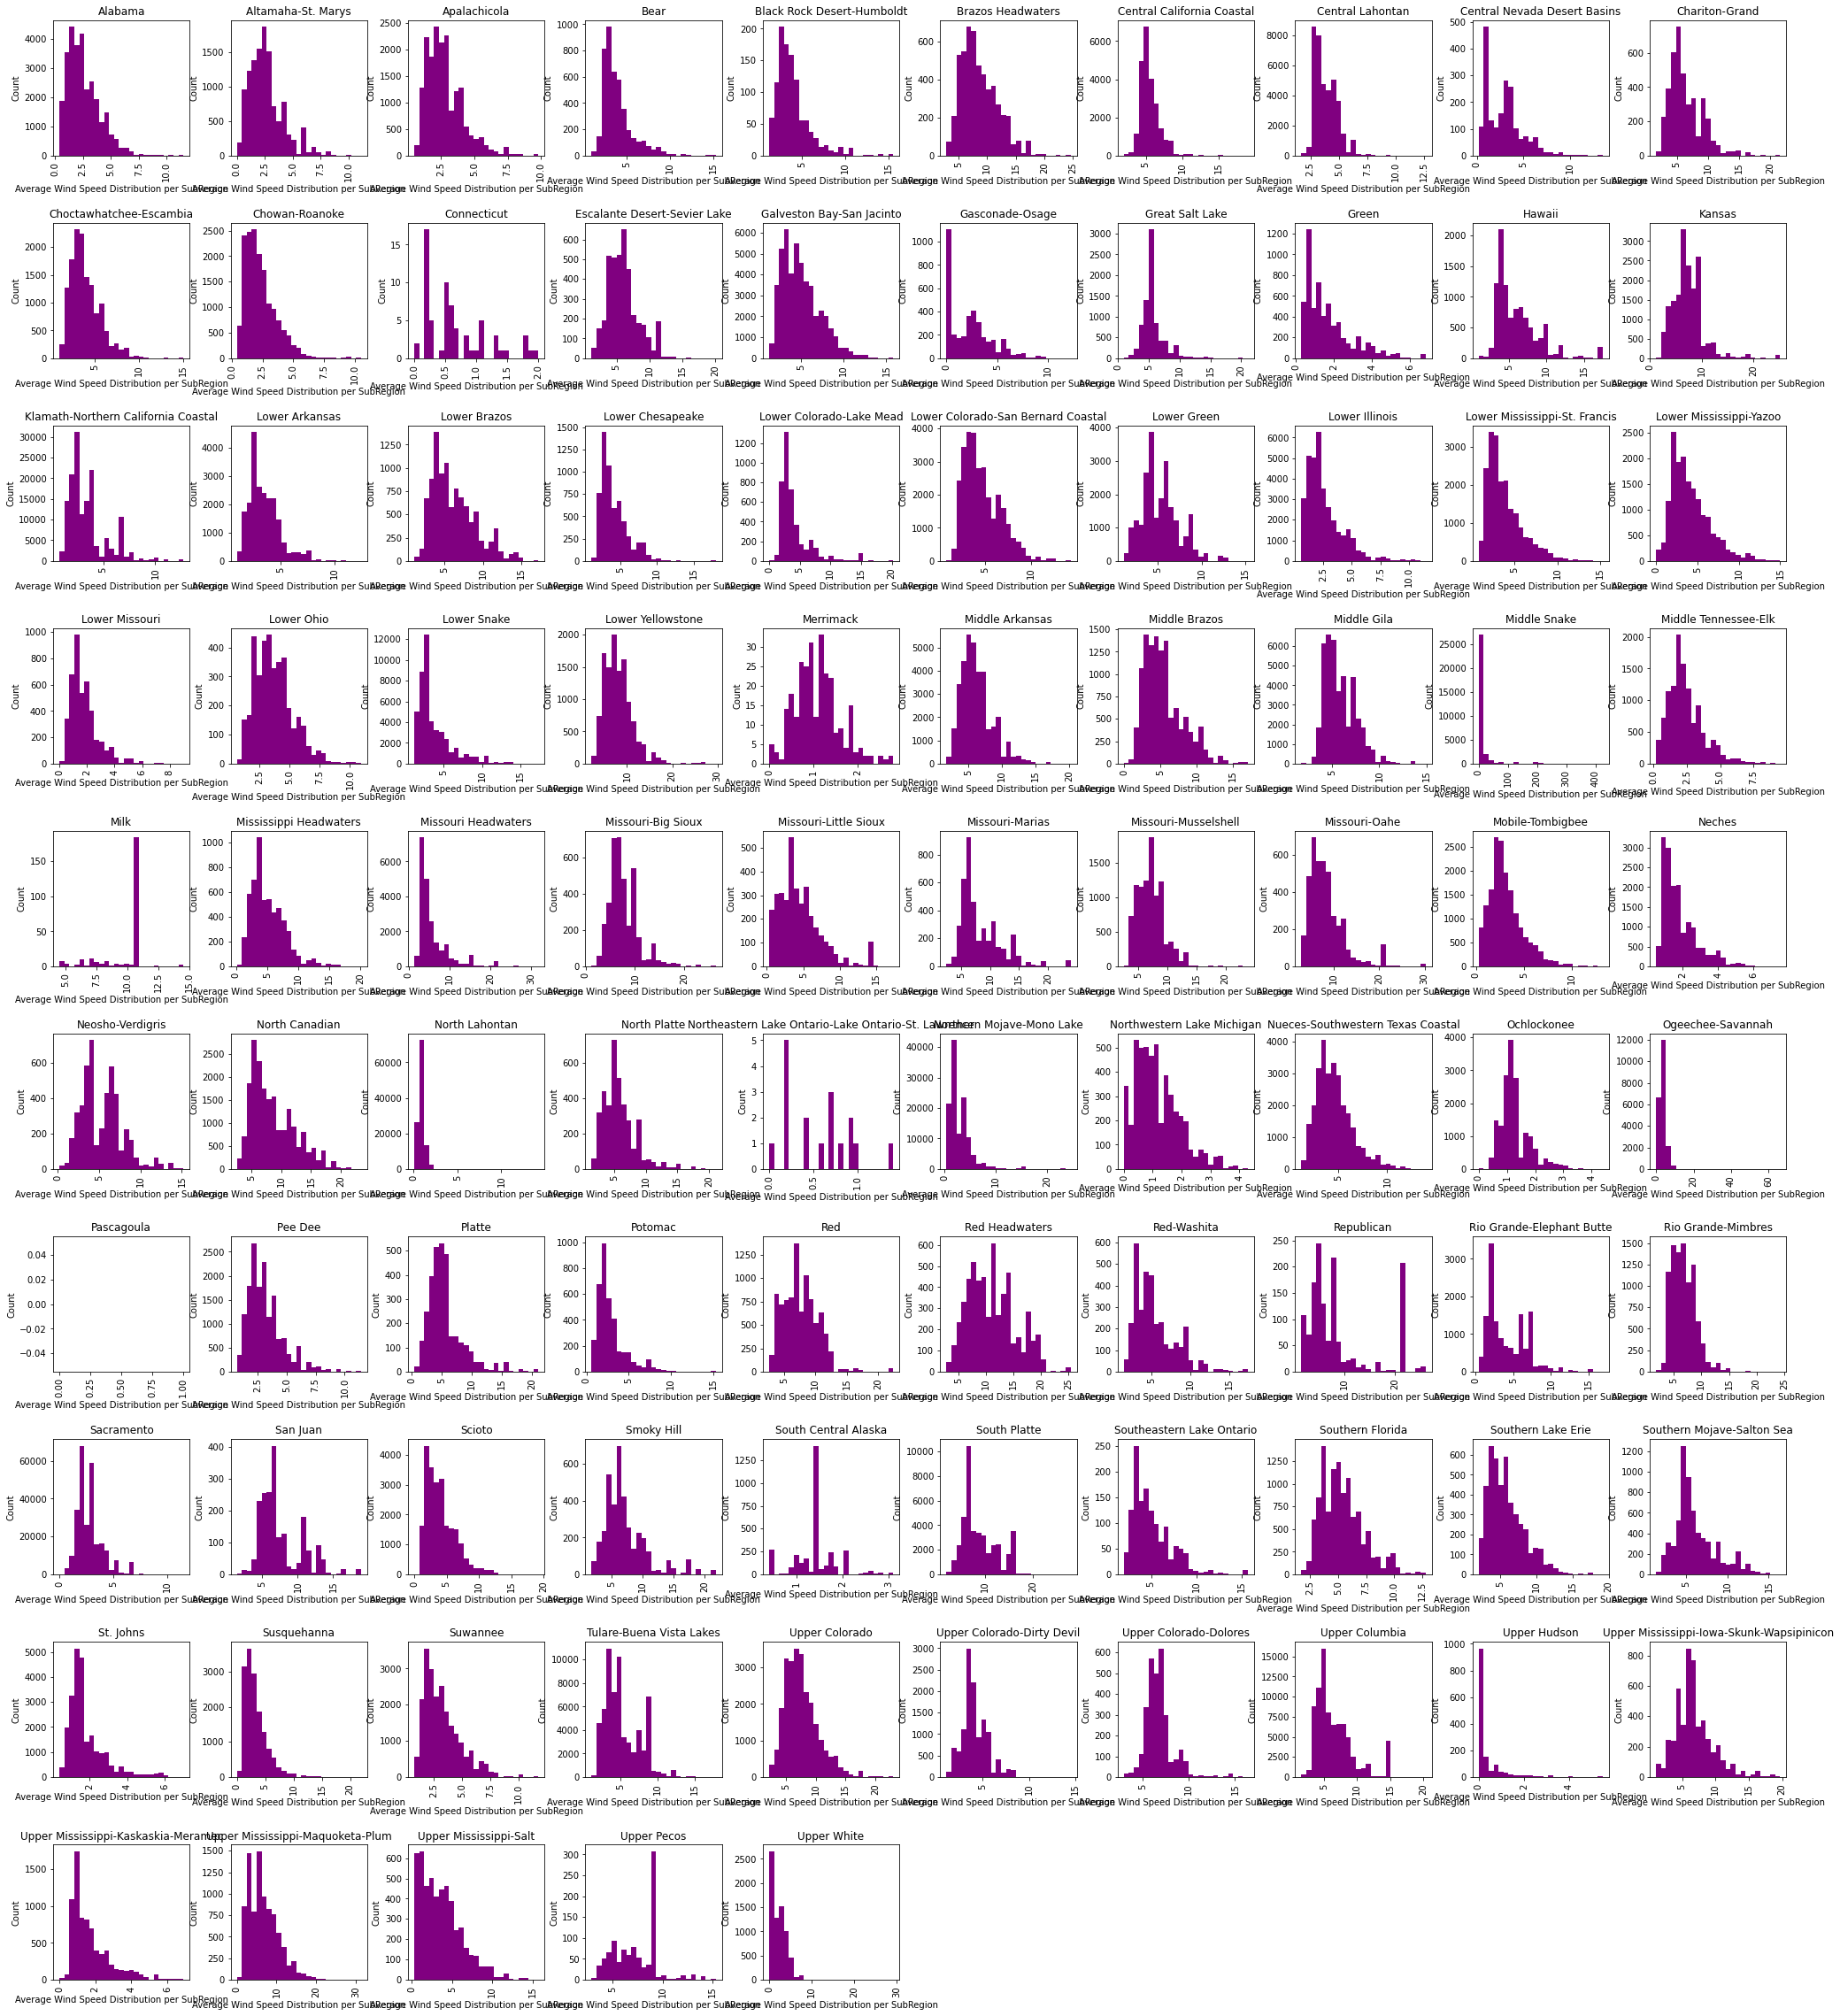

In [24]:
#Create histograms of the distribution of average wind speed measurements, seperated by subregion.
ax = df.hist(column='Wind Speed Average (mph)', by='HUC4 Name', bins=25, figsize=(34,41), grid=False, color='purple')
for x in ax.flatten():
    x.set_xlabel("Average Wind Speed Distribution per SubRegion")
    x.set_ylabel("Count")

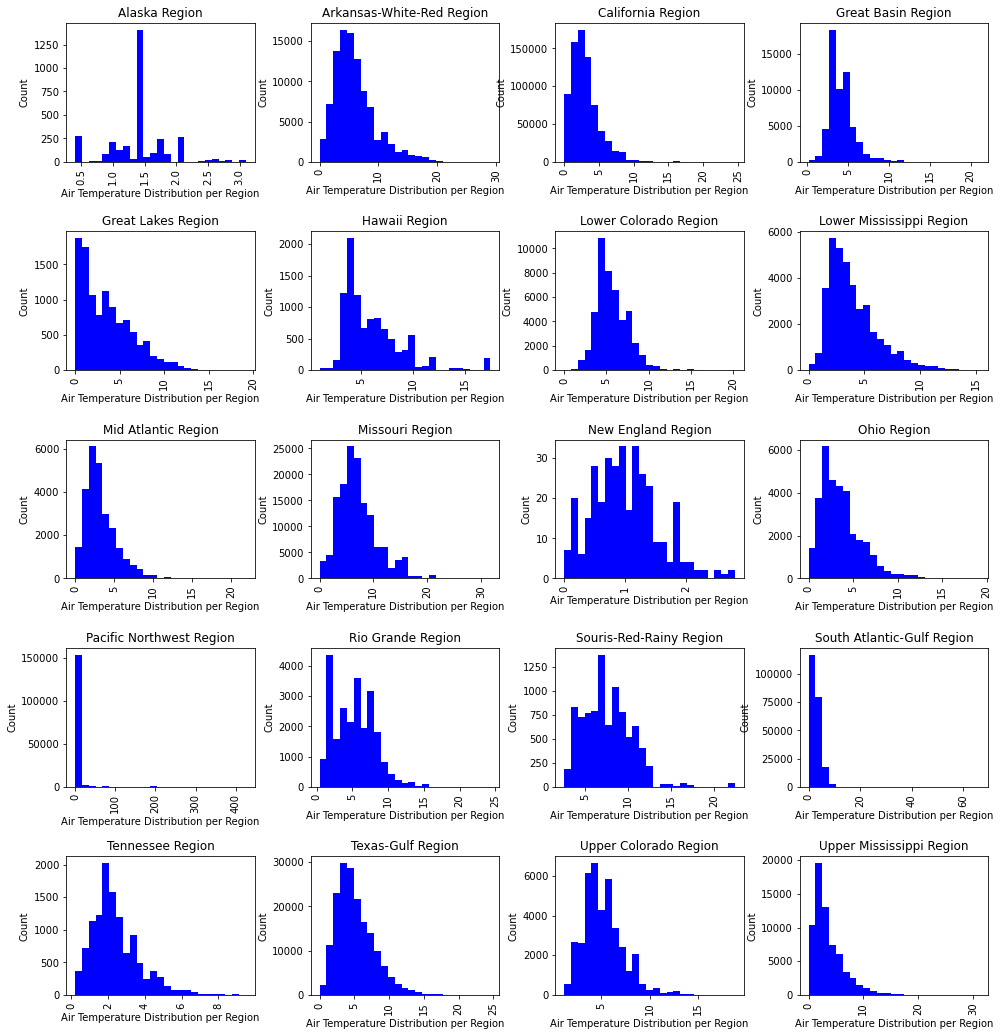

In [25]:
#Create histograms of the distribution of average air temperatures, seperated by region.
ax = df.hist(column='Wind Speed Average (mph)', by='HUC2 Name', bins=25, figsize=(16,18), grid=False, color='blue')
for x in ax.flatten():
    x.set_xlabel("Air Temperature Distribution per Region")
    x.set_ylabel("Count")

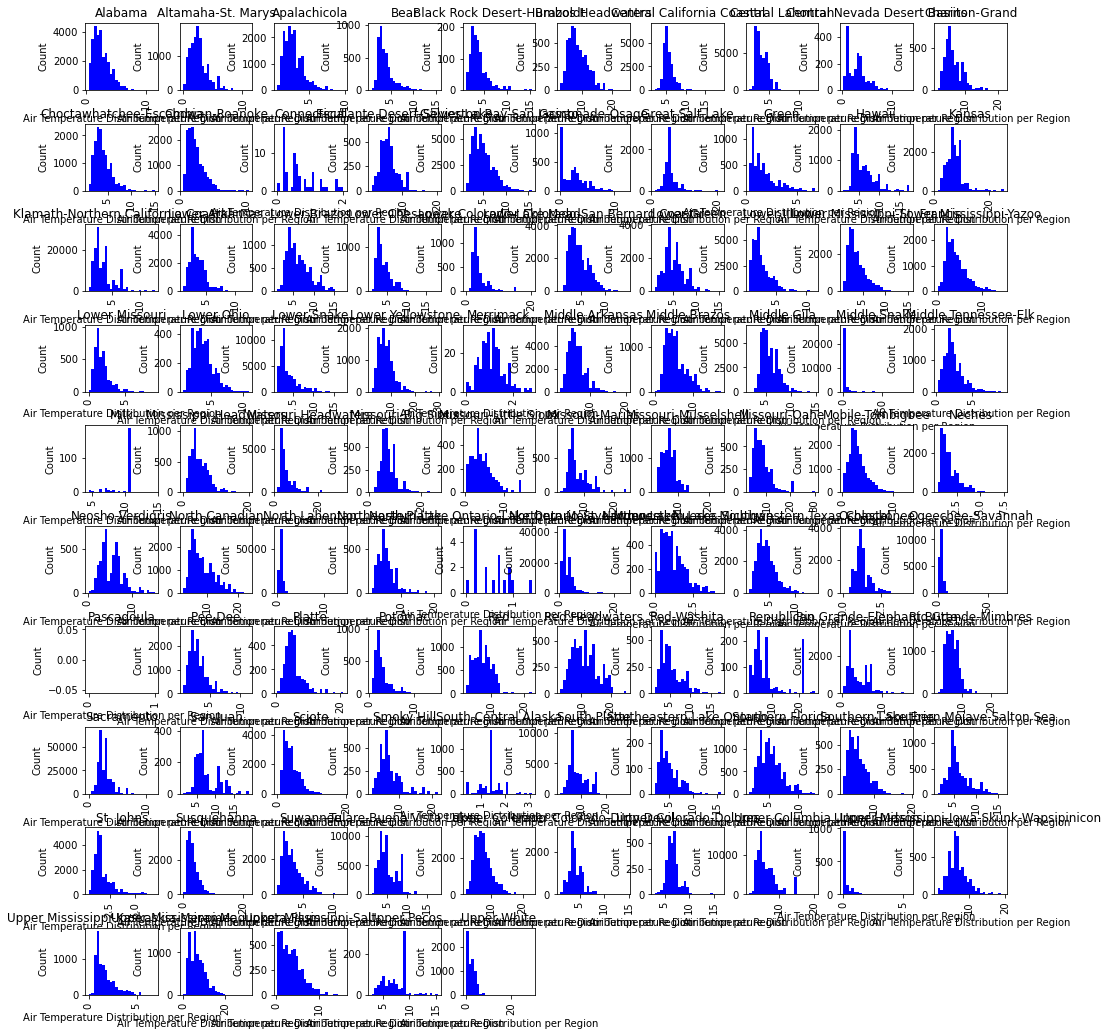

In [26]:
#Create histograms of the distribution of average air temperatures, seperated by subregion.
ax = df.hist(column='Wind Speed Average (mph)', by='HUC4 Name', bins=25, figsize=(16,18), grid=False, color='blue')
for x in ax.flatten():
    x.set_xlabel("Air Temperature Distribution per Region")
    x.set_ylabel("Count")

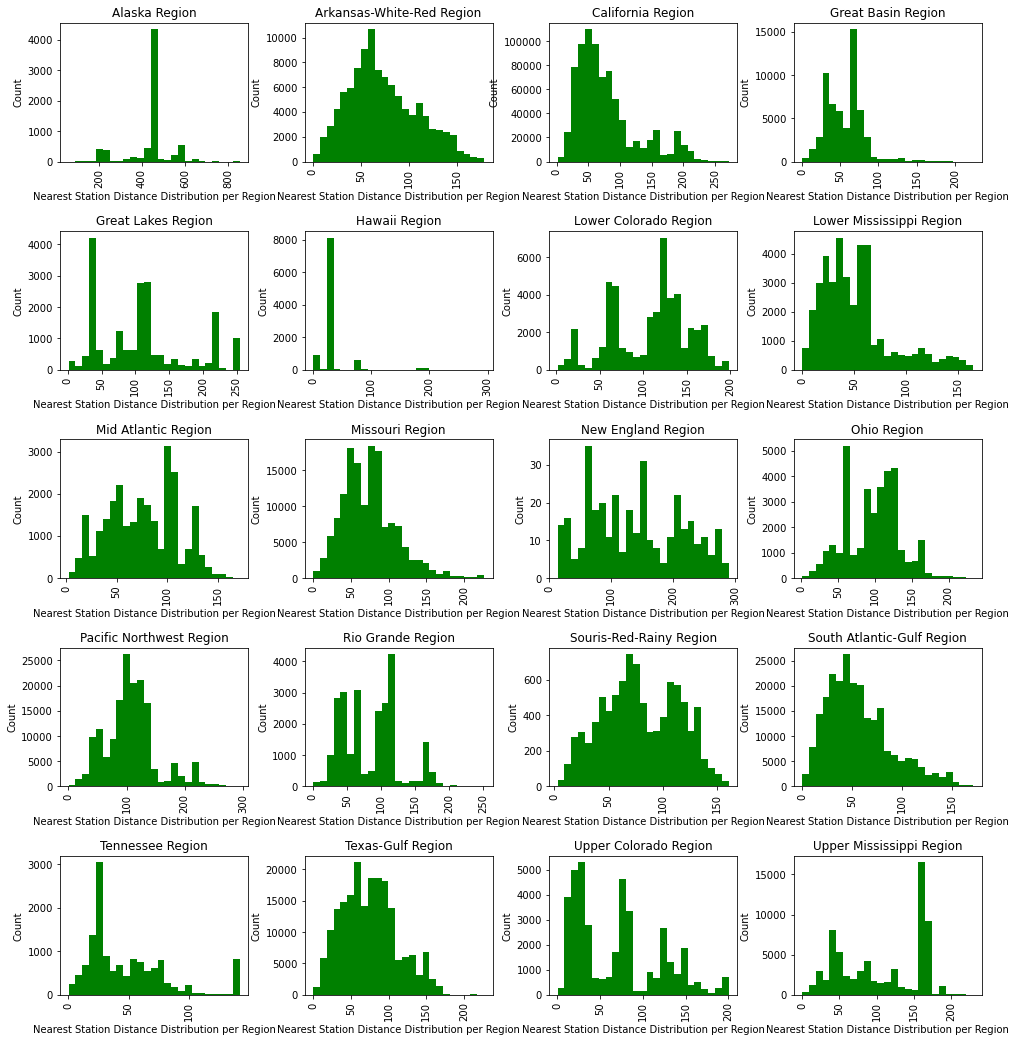

In [27]:
#Create histograms of the distribution of the distance to the nearest station, seperated by region.
ax = df.hist(column='StationDist', by='HUC2 Name', bins=25, figsize=(16,18), grid=False, color='green')
for x in ax.flatten():
    x.set_xlabel("Nearest Station Distance Distribution per Region")
    x.set_ylabel("Count")

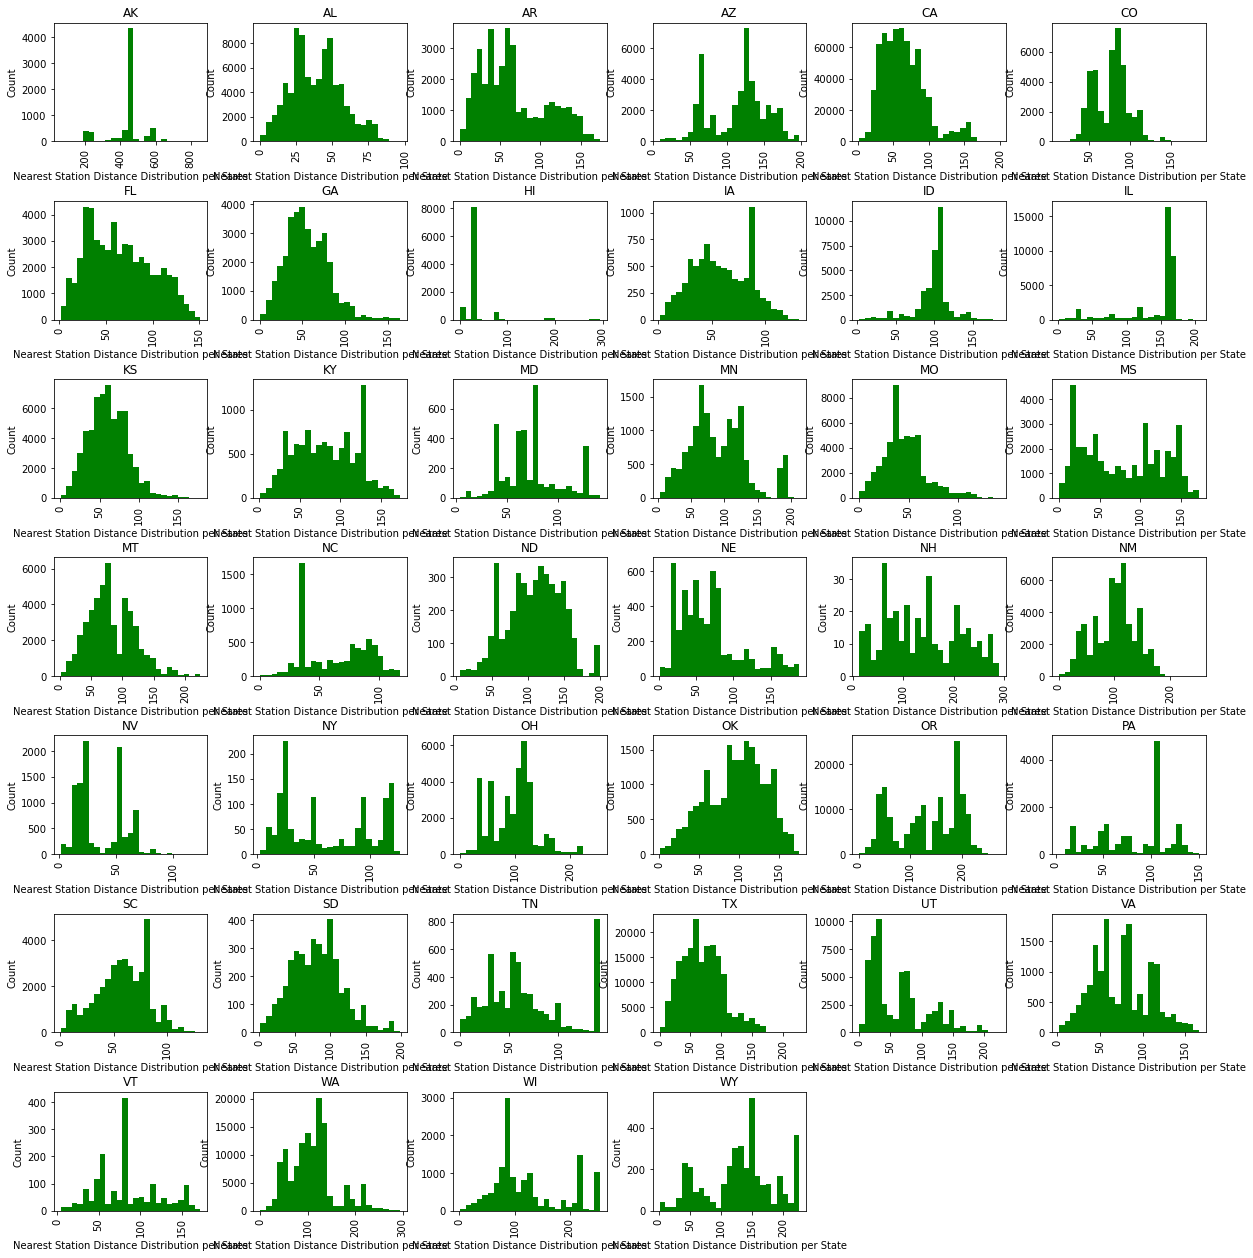

In [28]:
#Create histograms of the distribution of the distance to the nearest station, seperated by state.
ax = df.hist(column='StationDist', by='State Code', bins=25, figsize=(20,22), grid=False, color='green')
for x in ax.flatten():
    x.set_xlabel("Nearest Station Distance Distribution per State")
    x.set_ylabel("Count")

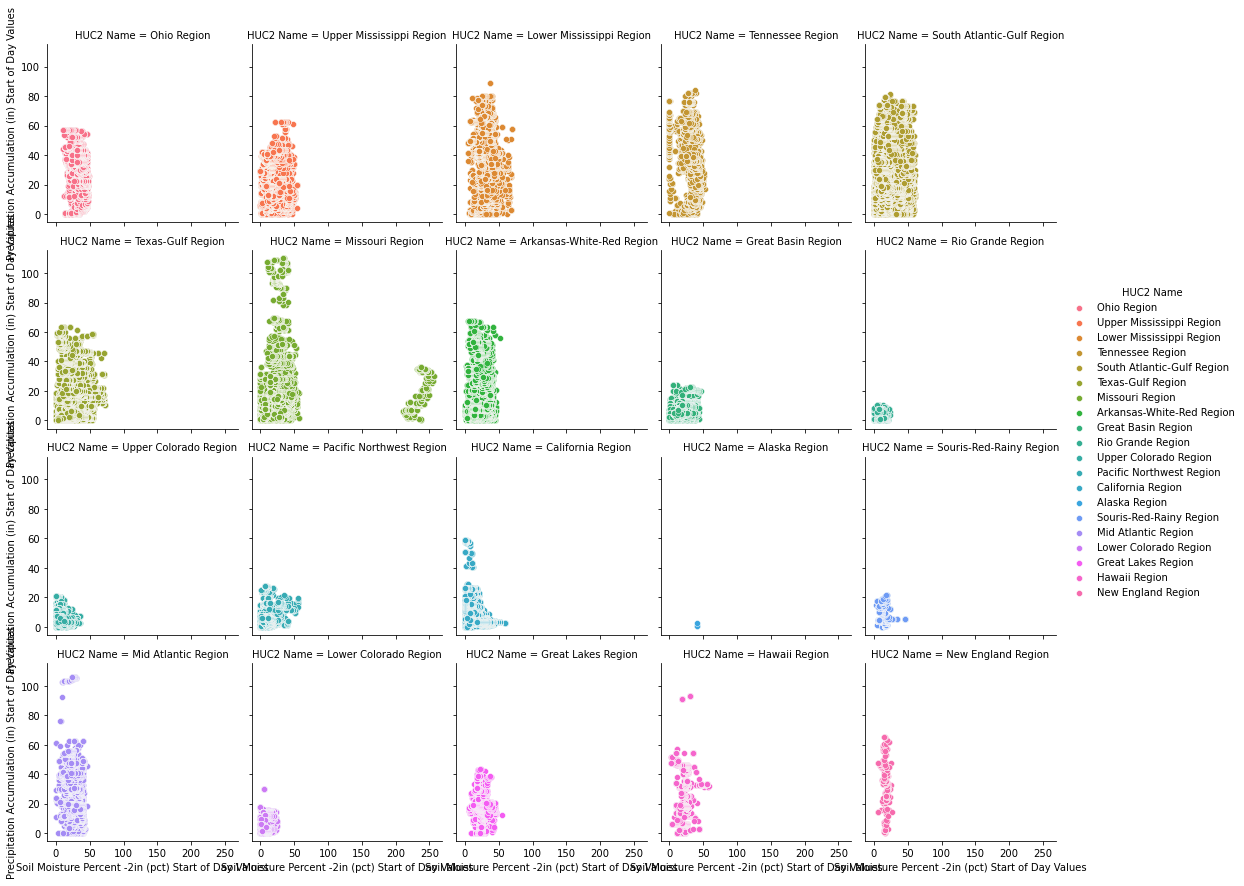

In [29]:
#Checking for correlation trends between Soil Moisture (-2 in) and Precipitation Accumulation (in) for each region.
grid = sns.FacetGrid(df, col = "HUC2 Name", hue ="HUC2 Name", col_wrap=5)
grid.map(sns.scatterplot, "Soil Moisture Percent -2in (pct) Start of Day Values", "Precipitation Accumulation (in) Start of Day Values")

grid.add_legend()

plt.show()

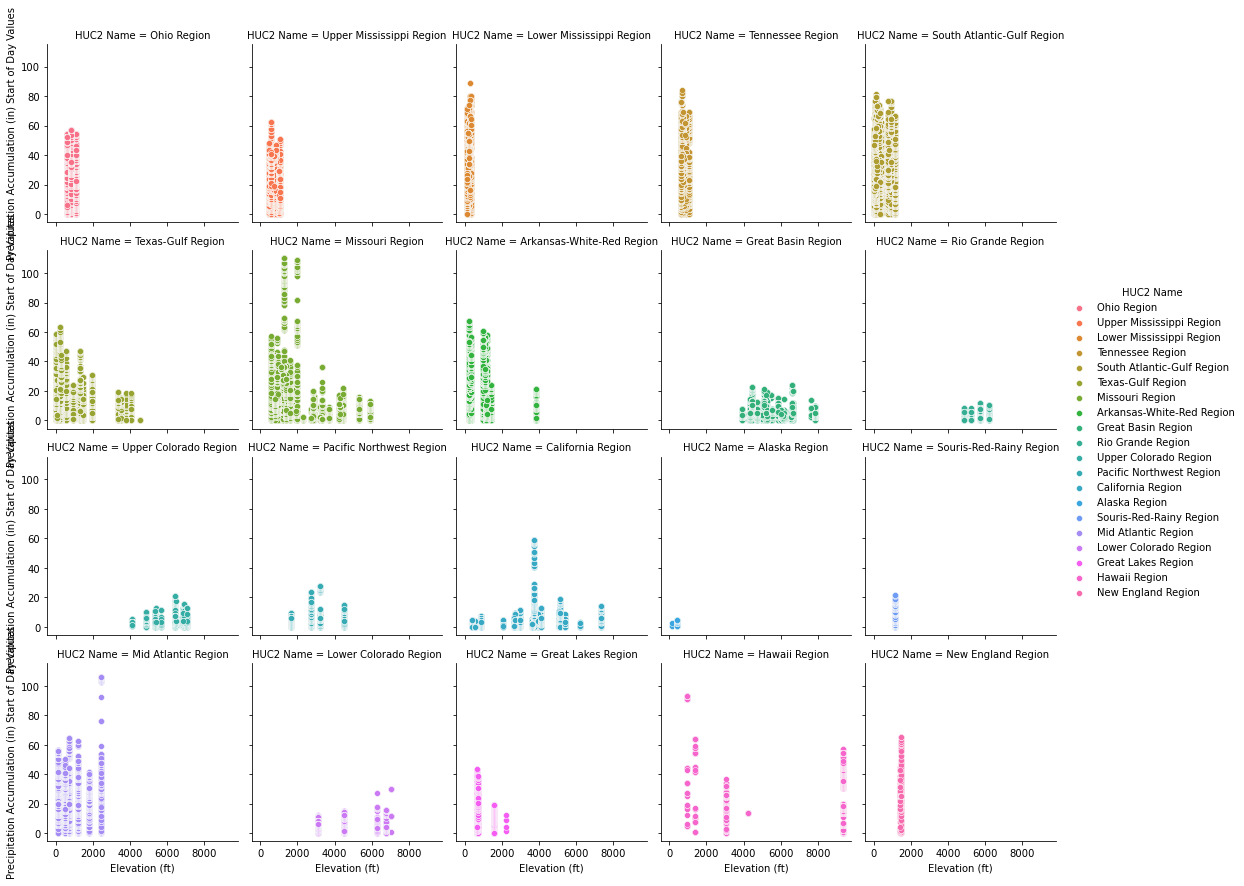

In [30]:
#Checking for correlation trends between Elevation and Precipitation Accumulation (in) for each region.
grid = sns.FacetGrid(df, col = "HUC2 Name", hue ="HUC2 Name", col_wrap=5)
grid.map(sns.scatterplot, "Elevation (ft)", "Precipitation Accumulation (in) Start of Day Values")

grid.add_legend()

plt.show()